<a href="https://colab.research.google.com/github/sky16k/NLP/blob/main/NLP3_Extracting_Information_banki_sent_vocab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#/drive/data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys
data_path = '/content/data'
try:
    os.symlink('/content/drive/MyDrive/скул/DS/data', data_path)
    sys.path.insert(0,data_path)
except:
    pass
# Then you can install a library, and specify the target.
# !pip install --target=$data_path vk_api_config.py

Mounted at /content/drive


In [ ]:
# @title Generate table

shortcuts = r"""
Action                            Mac         Linux                Windows
Add cursors                       ⌥ ⌘ ↑/↓     Shift Alt ↑/↓        Ctrl Alt ↑/↓
Add cursor on next match          ⌘ D         Ctrl D               Ctrl D
Add cursor on all matches         ⇧ ⌘ L       Shift Ctrl L         Ctrl Shift L
Move line up/down                 ⌥ ↑/↓       Alt ↑/↓              Alt ↑/↓
Copy line up/down                 ⇧ ⌥ ↑/↓     Ctrl Shift Alt ↑/↓   Shift Alt ↑/↓
Delete left                       ⌘ ⌫         Ctrl Backspace       Ctrl Backspace
Delete right                      ⌃ k         (Unset by default)   (Unset by default)
Find with selection               ⌘ E         (Unset by default)   (Unset by default)
Expand/shrink selection           ⇧ ⌃ ⌘ →/←   Shift Alt →/←        Shift Alt →/←
Go to bracket                     ⇧ ⌘ \       Ctrl Shift \         Ctrl Shift \
Replace with next/previous value  ⇧ ⌘ , / .   Ctrl Shift , / .     Ctrl Shift , / .
Transpose letters                 ⌃ T         (Unset by default)   (Unset by default)
"""

import io
import pandas as pd
df = pd.read_csv(io.StringIO(shortcuts), delimiter=' {2,}', engine='python')
df = df.set_index('Action').drop(columns=['Mac'])
df

Linux             Windows
Action                                                                  
Add cursors                            Shift Alt ↑/↓        Ctrl Alt ↑/↓
Add cursor on next match                      Ctrl D              Ctrl D
Add cursor on all matches               Shift Ctrl L        Ctrl Shift L
Move line up/down                            Alt ↑/↓             Alt ↑/↓
Copy line up/down                 Ctrl Shift Alt ↑/↓       Shift Alt ↑/↓
Delete left                           Ctrl Backspace      Ctrl Backspace
Delete right                      (Unset by default)  (Unset by default)
Find with selection               (Unset by default)  (Unset by default)
Expand/shrink selection                Shift Alt →/←       Shift Alt →/←
Go to bracket                           Ctrl Shift \        Ctrl Shift \
Replace with next/previous value    Ctrl Shift , / .    Ctrl Shift , / .
Transpose letters                 (Unset by default)  (Unset by default)

#Домашнее задание
#  Домашнее задание по NLP # 2.  Составление словарей для классификации по тональности [100 баллов]


При классификации текстов или предложений по тональности необходимо использовать оценочные словари для предметной области, то есть, такие словари, в которых содержатся отрицательные и позитивные слова для какой-то предметной области. Идея подобных словарей основана на следующих наблюдениях: во-первых, для разных товаров используются разные оценочные слова (например бывает “захватывающая книга”, но не бывает “захватывающих лыж”), во-вторых, в контексте разных товаров одни и те же слова могут иметь разную окраску (слово “тормоз” в отзыве на велосипед имеет нейтральную окраску, в отзыве на компьютер – резко негативную, “пыль” в контексте пылесосов – нейтральную, в контексте кофемолок – положительную (“мелкий помол в пыль”)). Еще один пример: "теплое пиво" – это плохо, а "теплый свитер" – это хорошо.  

Составление таких словарей в ручную – трудоемкий процесс, но, к счастью, его не сложно автоматизировать, если собрать достаточно большие корпуса отзывов. В этом домашнем задании вам предстоит попробовать реализовать один их подходов к составлению оценочных словарей, основанный на статье Inducing Domain-Specific Sentiment Lexicons from Unlabeled Corpora (https://nlp.stanford.edu/pubs/hamilton2016inducing.pdf).


Данные для задания – уже знакомые вам отзывы на банки, собранные с нескольких сайтов Рунета. Отзывы могут быть как положительными (оценка 5), так и отрицательными (оценка 1).

## Задание 1.  Обучение модели word2vec [50 баллов]

###текст

Часть 1.

1. Разбейте всю коллекцию отзывов на предложения. Лемматизируйте все слова.
2. Обучите по коллекции предложений word2vec
3. Приведите несколько удачных и неудачных примеров решения стандартных текстов для word2vec:
    * тест на определение ближайших слов
    * тест на аналогии (мужчина – король : женщина – королева)
    * тест на определение лишнего слова.
    
4. Постройте несколько визуализаций:
    * TSNE для топ-100 (или топ-500) слов и найдите осмысленные кластеры слов
    * задайте координаты для нового пространства следующим образом: одна  ось описывает отношение "плохо – хорошо", вторая – "медленно – быстро" и найдите координаты названий банков в этих координатах.  Более формально:
    берем вектор слова "хорошо", вычитаем из него вектор слова "плохо", получаем новый вектор, который описывает разницу между хорошими и плохими словами. Берем вектор слова "сбербанк" и умножаем его на этот новый вектор – получаем координату по первой оси. Аналогично – для второй оси. Две координаты уже можно нарисовать на плоскости.  



Ссылка на примеры визуализаций: https://towardsdatascience.com/game-of-thrones-word-embeddings-does-r-l-j-part-2-30290b1c0b4b

In [ ]:
# комментарий эксперта
'''

'''

In [ ]:
'''

'''

###программа

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [ ]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# !git lfs install

In [ ]:
responses = []
with bz2.BZ2File('/content/data/banki_responses (2).json.bz2', 'rb') as thefile:
    # print('0')
    # print(thefile)
    # content = thefile.seek(1)
    # print(content)
    for row in tqdm(thefile):
        # print('1')
        # break
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [06:28, 517.89it/s]


In [ ]:
responses#(99)

[{'city': 'г. Москва',
  'rating_not_checked': False,
  'title': 'Жалоба',
  'num_comments': 0,
  'bank_license': 'лицензия № 2562',
  'author': 'uhnov1',
  'bank_name': 'Бинбанк',
  'datetime': '2015-06-08 12:50:54',
  'text': 'Добрый день! Я не являюсь клиентом банка и поручителем по кредитному договору, а также не являюсь каким-либо другим лицом, письменно  оформившим отношения с банком по поводу урегулирования чьей-либо  задолженности.  Начиная с марта 2015 года начали приходить бесконечные письма из ООО "Примо коллект"на мой адрес: город Москва, Уваровский переулок, дом 10, квартира 111, с угрозами о возбуждении уголовного дела в отношении гражданина Филиппова Эдуарда Владимировича, который уклоняется от уплаты взятых им кредитов: договор № 81014 от 20.10.2013 года и договор № 2464946 от 09.10.2014 года. Со всей ответственностью\xa0 хочу Вас заверить, что вышеуказанный гражданин, которого Вы разыскиваете, мне не знаком и никогда в моем адресе не был зарегистрирован. Каким образом 

In [ ]:
data = pd.DataFrame.from_dict(responses, orient='columns')
data

city  rating_not_checked  \
0            г. Москва               False   
1       г. Новосибирск               False   
2            г. Москва               False   
3        г. Ставрополь               False   
4         г. Челябинск               False   
...                ...                 ...   
153494            None               False   
153495            None               False   
153496            None               False   
153497            None               False   
153498            None               False   

                                                    title  num_comments  \
0                                                  Жалоба             0   
1           Не могу пользоваться услугой Сбербанк он-лайн             0   
2                         Двойное списание за один товар.             1   
3       Меняют проценты комиссии  не предупредив и не ...             2   
4                  Верните денежные средства за страховку             1   
...                                                   ...           ...   
153494                                 Не все так страшно             0   
153495                               А вы договор читали?             0   
153496                    Филиал банка "ОВК" в г. Иваново             1   
153497            В Альфа-Банк больше обращаться не буду.             0   
153498                                    Быстро и удобно             0   

           bank_license       author        bank_name             datetime  \
0       лицензия № 2562       uhnov1          Бинбанк  2015-06-08 12:50:54   
1       лицензия № 1481       Foryou  Сбербанк России  2015-06-08 11:09:57   
2       лицензия № 2562   Vladimir84          Бинбанк  2015-06-05 20:14:28   
3       лицензия № 1481       643609  Сбербанк России  2015-06-05 13:51:01   
4       лицензия № 2766  anfisa-2003         ОТП Банк  2015-06-05 10:58:12   
...                 ...          ...              ...                  ...   
153494  лицензия № 2557         Вера         Ситибанк  2005-05-18 14:38:00   
153495  лицензия № 2557       Kirill         Ситибанк  2005-04-14 15:25:00   
153496  лицензия № 2272   AlexU-post          Росбанк  2005-04-08 14:07:00   
153497  лицензия № 1326        Ирина       Альфа-Банк  2005-04-14 15:16:00   
153498  лицензия № 1326        Денис       Альфа-Банк  2005-04-13 17:43:00   

                                                     text  rating_grade  
0       Добрый день! Я не являюсь клиентом банка и пор...           NaN  
1       Доброго дня! Являюсь держателем зарплатной кар...           NaN  
2       Здравствуйте!  Дублирую свое заявление от 03.0...           NaN  
3       Добрый день!! Я открыл расчетный счет в СберБа...           NaN  
4       04.03.2015 г. взяла кредит в вашем банке, заяв...           NaN  
...                                                   ...           ...  
153494  Слишком большой банк, не всегда учитывает нашу...           5.0  
153495  Вы сами виноваты в своих проблемах, кроме пред...           3.0  
153496  Уважаемое руководство банка «ОВК»! Я проживаю ...           1.0  
153497  Пробовала 10.04.05 оформить товар в кредит в А...           1.0  
153498  Если коротко, то мне нравится. Кридит получать...           5.0  

[153499 rows x 10 columns]

In [ ]:
data.bank_name.unique()

array(['Бинбанк', 'Сбербанк России', 'ОТП Банк', 'Гагаринский',
       'Тинькофф Банк', 'Восточный Экспресс Банк', 'ВТБ 24', 'Альфа-Банк',
       'БИНБАНК кредитные карты', 'МТС Банк', 'Совкомбанк',
       'Россельхозбанк', 'Московский Кредитный Банк', 'МДМ Банк',
       'Хоум Кредит Банк', 'Бенифит-Банк',
       'Уральский Банк Реконструкции и Развития', 'Русский Стандарт',
       'Лето Банк', 'Петрокоммерц', 'Русфинанс Банк', 'Киви Банк',
       'Ханты-Мансийский банк Открытие', 'Русславбанк', 'Татфондбанк',
       'МАСТ-Банк', 'Национальный Банк «Траст»',
       'Военно-Промышленный Банк', 'АктивКапитал Банк', 'Связной Банк',
       'Платежный Центр', 'Московский Индустриальный Банк',
       'Финансовый Стандарт', 'Ренессанс Кредит', 'Югра',
       'ЮниКредит Банк', 'Банкирский Дом', 'Кредит Европа Банк',
       'Тройка-Д Банк', 'ДельтаКредит', 'Сетелем Банк', 'РосинтерБанк',
       'ФК Открытие (бывш. НОМОС-Банк)', 'Банк Москвы', 'Росбанк',
       'Авангард', 'Внешпромбанк', 'Росэн

In [ ]:
df = data [data.rating_grade.notnull()] [['text','rating_grade']].copy()
df

text  rating_grade
14      Также как и многие давний клиент банка, был до...           2.0
19      Открыт вклад и счет в USD. Плюс к этому есть з...           1.0
33      Доброго времени! Вчера мне поступило смс-уведо...           1.0
76      05.06.2015г. около 15 часов, пришел в указанны...           1.0
85      Для оплаты коммунальных платежей пользуюсь пла...           1.0
...                                                   ...           ...
153494  Слишком большой банк, не всегда учитывает нашу...           5.0
153495  Вы сами виноваты в своих проблемах, кроме пред...           3.0
153496  Уважаемое руководство банка «ОВК»! Я проживаю ...           1.0
153497  Пробовала 10.04.05 оформить товар в кредит в А...           1.0
153498  Если коротко, то мне нравится. Кридит получать...           5.0

[88658 rows x 2 columns]

<Axes: >

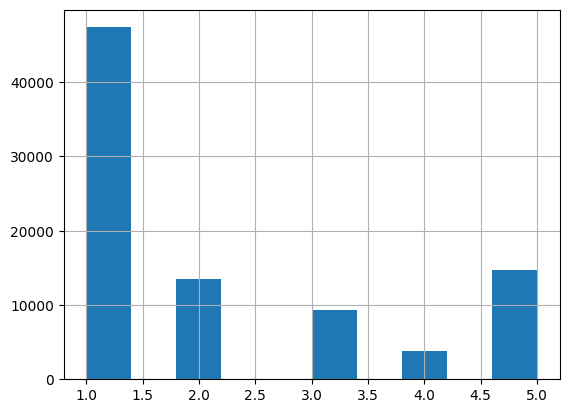

In [ ]:
df.rating_grade.hist()

In [ ]:
# df = pd.read_csv('/content/data/final_review_dataset_extended.csv')
# df

In [ ]:
data.bank_name.unique()

array(['Бинбанк', 'Сбербанк России', 'ОТП Банк', 'Гагаринский',
       'Тинькофф Банк', 'Восточный Экспресс Банк', 'ВТБ 24', 'Альфа-Банк',
       'БИНБАНК кредитные карты', 'МТС Банк', 'Совкомбанк',
       'Россельхозбанк', 'Московский Кредитный Банк', 'МДМ Банк',
       'Хоум Кредит Банк', 'Бенифит-Банк',
       'Уральский Банк Реконструкции и Развития', 'Русский Стандарт',
       'Лето Банк', 'Петрокоммерц', 'Русфинанс Банк', 'Киви Банк',
       'Ханты-Мансийский банк Открытие', 'Русславбанк', 'Татфондбанк',
       'МАСТ-Банк', 'Национальный Банк «Траст»',
       'Военно-Промышленный Банк', 'АктивКапитал Банк', 'Связной Банк',
       'Платежный Центр', 'Московский Индустриальный Банк',
       'Финансовый Стандарт', 'Ренессанс Кредит', 'Югра',
       'ЮниКредит Банк', 'Банкирский Дом', 'Кредит Европа Банк',
       'Тройка-Д Банк', 'ДельтаКредит', 'Сетелем Банк', 'РосинтерБанк',
       'ФК Открытие (бывш. НОМОС-Банк)', 'Банк Москвы', 'Росбанк',
       'Авангард', 'Внешпромбанк', 'Росэн

In [ ]:
banks = ['Бинбанк', 'Сбербанк', 'ОТП', 'Гагаринский',
       'Тинькофф', 'Восточный', 'ВТБ', 'Альфа',
       'БИНБАНК', 'МТС', 'Совкомбанк',
       'Россельхозбанк', 'Московский', 'МДМ',
       'Хоум', 'Бенифит',
       'Уральский', 'Русский',
       'Лето', 'Петрокоммерц', 'Русфинанс', 'Киви',
       'Открытие', 'Русславбанк', 'Татфондбанк',
       'МАСТ', '«Траст»',
       'Военно', 'АктивКапитал', 'Связной',
       'Платежный', 'Индустриальный',
       'Финансовый Стандарт', 'Ренессанс', 'Югра',
       'ЮниКредит', 'Банкирский', 'Европа',
       'Тройка-Д', 'ДельтаКредит', 'Сетелем', 'РосинтерБанк',
       'НОМОС', 'Москвы', 'Росбанк',
       'Авангард', 'Внешпромбанк', 'Росэнергобанк', 'Капитал',
       'Российский', 'Газпромбанк', 'Москва',
       'Промсвязьбанк', 'Европлан', 'Адамон', 'РосЕвроБанк',
       'Ситибанк', 'Райффайзенбанк', 'Нота', 'АйМаниБанк',
       'Яндекс.Деньги', 'Объединенныйный',
       'Интеркоммерц', 'Бинбанк', 'Адмиралтейский',
       'Соверен', 'Владпромбанк', 'Дил', 'Донхлеббанк',
       'СДМ', 'Международный', 'Уралсиб', 'Стратегия',
       'Коммерческий', 'Метробанк',
       'Возрождение', 'Финам', 'Абсолют', 'Первобанк',
       'Тихоокеанский', 'Областной',
       'Плюс', 'Барс', 'Верхневолжский', 'Океан',
       'Юниаструм', 'Фора', 'Сибэс', 'ОПМ', 'СКБ',
       'Чайна Констракшн', 'Росавтобанк', 'Почтовый',
       'ИТБ', 'Советский', 'Клиентский', 'Интерактивный',
       'Союз', 'СМП', 'Рублев', 'Собинбанк',
       'Алеф', 'Трансстройбанк', 'ББР',
       'Ипотечный', 'Крайинвестбанк', 'Центр',
       'Пробизнесбанк', 'Смартбанк', 'Балтика', 'Росгосстрах',
       'Торговый', 'Кроссинвестбанк', 'Нордеа',
       'Инвестторгбанк', 'Балтинвестбанк', 'Темпбанк',
       'Корпоративный', 'Генбанк', 'Арксбанк',
       'Финсервис', 'Республиканский',
       'Ижкомбанк', 'Волга', 'СИАБ', 'Солид',
       'Транскапиталбанк', 'РН', 'Форус',
       'Трастовый', 'Оранжевый','Промсервисбанк',
       'Констанс', 'Воронеж', 'Зенит', 'Сургутнефтегазбанк',
       'БКС', '«Санкт-Петербург»',
       'Ланта', 'Транспортный', 'РФИ', 'Анелик', 'Локо',
       'Образование', 'Миллениум', 'Гута', 'Ренессанс',
       'Ипотечное', 'Первомайский', 'Анталбанк',
       'Интерпрогрессбанк', 'Регнум', 'Россия', 'Таврический',
       'Кубань', 'Связь', 'Унифин', 'Интеза',
       'Мосстройэкономбанк', 'БФГ', 'ФИА', 'Веста',
       'Вятка', 'Финпромбанк','ФПБ', 'Агросоюз', 'Спурт',
       'Региональный', 'Союзный', 'Эргобанк',
       'Камский', 'Рост', 'Аверс',
       'Меткомбанк', 'Бумеранг', 'БыстроБанк', 'Союз',
       'Риабанк', 'Залоговый', 'Миръ', 'Левобережный',
       'Кошелев', 'Балтийский', 'Городской',
       'НБД', 'Жилищного', 'ВТБ', 'Зенит',
       'Пойдем', 'Таурус', 'Легион', 'Внешэкономбанк',
       'Гринкомбанк', 'Газэнергобанк', 'Объединенный Национальный',
       'ЯР', 'Метрополь', 'НС', 'Русстройбанк',
       'Экспресс', 'Ярославич', 'Челиндбанк', 'Эксперт',
       'Кольцо Урала', 'Межтрастбанк', 'Межтопэнергобанк', 'СтарБанк',
       'Инвесткапиталбанк', 'Париба', 'Москоммерцбанк',
       'Энергомашбанк', 'Глобэкс', 'Транснациональный',
       'Башкомснаббанк', 'Аспект', 'Союз',
       'Профессионал', 'Солидарность', 'Город',
       'Заубер', 'Уссури', 'Еврокоммерц', 'Новикомбанк',
       'Муниципальный Камчатпрофитбанк', 'Пересвет', 'Юнистрим',
       'ТЭМБР', 'Живаго', 'ПСА',
       'Премьер', 'Мираф', 'Промсбербанк', 'БКФ',
       'Плато', 'Канский', 'Ставропольпромстройбанк', 'Анкор',
       'Социнвестбанк', 'Тусар', 'Конфидэнс', 'Финарс',
       'Примсоцбанк', 'Нейва', 'Развитие', 'Рапида', 'МФБанк',
       'Челябинвестбанк', 'Агропромкредит', 'Экономбанк', 'Евромет',
       'Тульский', 'Урал', 'Иваново',
       'Бизнес', 'Милбанк',
       'Сотрудничество', 'СКА',
       'Уралтрансбанк', 'Чешско', 'ВУЗ',
       'Энерготрансбанк', 'Рускобанк', 'Фондсервисбанк', 'Татсоцбанк',
       'Невский', 'Солидарность', 'МБА',
       'Акцент', 'Мико', 'Выборг', 'Йошкар', 'Оргбанк',
       'Судостроительный', 'Леноблбанк',
       'Социальный', 'Уралфинанс',
       'БМВ', 'Мегаполис', 'Металлинвестбанк', 'И.Д.Е.А.',
       'Альта', 'НСТ', 'Экспресс', 'Экспобанк',
       'Меткомбанк', 'ЮГ', 'Газстройбанк',
       'Интехбанк', 'Аксонбанк', 'НоваховКапиталБанк', 'Дагэнергобанк',
       'Морской', 'Черноморский развития и реконструкции',
       'Личный', 'ЦентроКредит', 'Центркомбанк', 'СГБ',
       'РСКБ', 'Тойота', 'Финансирования', 'Вокбанк',
       'Уралпромбанк', 'РИТ', 'Новопокровский', 'Межрегионбанк',
       'РУБанк', 'Эл', 'Ринвестбанк', 'Мосводоканалбанк',
       'Енисейский', 'Век', 'Айви', 'Резерв',
       'Расчетный', 'Церих',
       'Уральский', 'Волга', 'Екатеринбург',
       'Капиталбанк', 'Фольксваген', 'Промтрансбанк', 'Акцепт',
       'Джей', 'Славия', 'Запсибкомбанк',
       'Современный', 'ДжиИ',
       'Казани', 'Развития', 'Крыловский',
       'Тюменьагропромбанк', 'Регионов',
       'Форштадт', 'Девон', 'Кранбанк', 'Булгар', 'АББ',
       'Платина', '2Т', 'Александровский', 'Курскпромбанк',
       'Златкомбанк', 'Алданзолотобанк', 'Саровбизнесбанк', 'АВБ',
       'Клиринговый', 'Региональный',
       'Нацинвестпромбанк', 'Кедр', 'Энергобанк', 'ТверьУниверсалБанк',
       'БайкалИнвестБанк', 'Горбанк', 'Промрегионбанк',
       'Внешторгбанк', 'МАК', 'БайкалБанк',
       'Консервативный', 'Таатта', 'Народный',
       'Донинвест', 'Липецккомбанк', 'Приморье', 'Спецсетьстройбанк',
       'Народный', 'Богородский',
       'Интрастбанк', 'Курган', 'Вега', 'Далена',
       'Нефтехимический', 'Первый',
       'Москва', 'ГПБ', 'ЕвроситиБанк', 'МБФИ',
       'Новосибирский', 'Экопромбанк',
       'Чувашкредитпромбанк', 'Эсидбанк', 'Юникорбанк', 'Ишбанк',
       'Тимер', 'Эллипс', 'ИпоТек',
       'Компания Розничногоования', 'Фининвест', 'Форбанк',
       'Бум', 'БФА', 'Русский',
       'Корпоративный', 'ИстКом', 'Диг',
       'Софрино', 'Снежинский', 'Тульский',
       'Замоскворецкий', 'Банк БФТ', 'Коммерческий',
       'Огни Москвы', 'Почтобанк', 'Навигатор', 'Нефтяной Альянс',
       'Дойче', 'Первый Республиканский', 'Кубаньторгбанк',
       'Стелла', 'Витабанк', 'Развития Бизнеса',
       'Экси', 'Вологжанин', 'Бузулукбанк', 'Западный', 'АФ',
       'Вексельный', 'Дальневосточный',
       'Саммит', 'С', 'Стройкредит', 'Русский Земельный',
       'Мой. Ипотека', 'Байкалкредобанк', 'Тальменка',
       'Интеркоопбанк', 'Монолит', 'РТС', 'Венец', 'Уралприватбанк',
       'Русь', 'Автоторгбанк', 'Роял',
       'Европейский Трастовый', 'Берейт', 'Взаимодействие',
       'Агророс', 'Мой', 'Трастовый Республиканский',
       'ОФК', 'Рублевский', 'Совинком', 'Кредитбанк',
       'Банк БЦК-Москва', 'Евросиб', 'Сбережений',
       'Банк Проектного Финансирования', 'Инвестбанк', 'Смоленский',
       'Волжский Социальный', 'Радиан', 'Мастер', 'Газбанк',
       'Нарат', 'Росдорбанк', 'Волго-Камский',
       'Европейский Экспресс', 'Единый Строительный', 'РусЮгбанк',
       'Ипозембанк', 'Транскредитбанк', 'Прио-Внешторгбанк', 'Еврокредит',
       'Стройлесбанк', 'Банк Развития Региона', 'Нико', 'Пушкино',
       'Сибнефтебанк', 'Вкабанк', 'Кузнецкий', 'Трансинвестбанк',
       'Инбанк', 'Европейский Индустриальный',
       'Региональный Развития', 'Новый Символ',
       'КИТ Финанс Инвестиционный',
       'Новокузнецкий Муниципальный', 'Славянский',
       'Басманный', 'Прокоммерцбанк', 'Автоградбанк', 'Углеметбанк',
       'Кор', 'Сетевая Расчетная Палата', 'Дом', 'ПК',
       'Банк Инноваций и Развития', 'Рост', 'Татагропромбанк',
       'Банк Расчетов и Сбережений', 'Линк', 'КС', 'Викинг',
       'Русский Финансовый Альянс', 'Столичный', 'Природа',
       'Мигом', 'Металлург', 'Акибанк', 'Еврофинанс Моснарбанк', 'ВЕБРР',
       'Невастройинвест', 'НОМОС-Сибирь',
       'Межрегиональный промышленно-строительный', 'Алтынбанк',
       'Тульский Расчетный Центр', 'Роспромбанк',
       'Межрегиональный Клиринговый', 'Хакасский Муниципальный',
       'Далькомбанк', 'ИК', 'Гринфилдбанк', 'Местный',
       'НОМОС-Региобанк', 'Витас', 'АМБ', 'Инвест-Экобанк',
       'Банк Раунд', 'Королевский Шотландии', 'Росбизнесбанк',
       'Холдинг-Кредит', 'ПВ', 'Ермак', 'Тетраполис',
       'Международный Инвестиционный', 'Интерпромбанк',
       'Москва-Сити', 'Интеркапитал', 'Тагилбанк', 'Земский',
       'Охотный Ряд', 'Сталь', 'Донкомбанк', 'Тревел',
       'Резервный', 'Уралкапиталбанк', 'УИК',
       'Коммерческий Развития', 'Лада-Кредит', 'Тольяттихимбанк',
       'Мастер-Капитал', 'Европейский',
       'Объединенный Промышленных Инвестиций', 'Сельмашбанк',
       'ИНГ', 'Банк Развития Технологий', 'БСТ',
       'Мой. Новосибирск', 'Белгородпромстройбанк',
       'Объединенный Резервный', 'АБ Финанс', 'АМТ',
       'Банк Сосьете Женераль Восток', 'Городской Ипотечный',
       'Свердловский Губернский', 'Северная Казна', 'Сведбанк',
       'Галабанк', 'Новобанк', 'Русич Центр',
       'Эйч-Эс-Би-Си (HSBC)', 'Соцгорбанк', 'Енисей',
       'Гранд Инвест', 'Мультибанк', 'Хованский',
       'Международный Санкт-Петербурга (МБСП)', 'Сиббизнесбанк',
       'Баренцбанк', 'Донбанк', 'Потенциал', 'Ури', 'Империя',
       'Славянский', 'Оренбург', 'Борский Коммерческий',
       'Петровский', 'Ураллига', 'Держава', 'Традо',
       'Газэнергопромбанк', 'Ростпромстройбанк', 'Хоум',
       'Прайм Финанс', 'Проминвестбанк',
       'Нижневолжский Коммерческий', 'Гарант',
       'Донской Народный', 'Тарханы', 'Стромкомбанк',
       'ВТБ Северо-Запад', 'Южный Региональный', 'Развитие-Столица',
       'Академический Русский', 'Экспресс', 'Камабанк', 'МДМ',
       'Ай-Си-Ай-Си-Ай (ICICI)', 'Град',
       'Нижегородпромстройбанк', 'Электроника', 'Банк Высоких Технологий',
       'Капитал', 'Торговый', 'Эталонбанк',
       'Столичный Торговый', 'Юго-Восток', 'Бест Эффортс',
       'ИРС', 'Современные Стандарты Бизнеса', 'Фемили', 'Соцкредитбанк',
       'Одинбанк', 'Южный Торговый', 'Капитал', 'Форпост',
       'Лефко', 'МБТС', 'Поволжский Немецкий',
       'Залоговый', 'Газинвестбанк', 'Лесбанк',
       'Башинвестбанк', 'Эконацбанк', 'Агрохимбанк', 'СЭБ',
       'Нижний Новгород', 'Верхне-Волжский Нефтебанк', 'Ярсоцбанк',
       'Сибконтакт', 'Русскийирский', 'Волгопромбанк',
       'Межпромбанк Плюс', 'Русь-Урал', 'Ноосфера',
       'М2М Прайвет', 'Южный Регион', 'Уралсиб-Юг', 'Движение',
       'Русский Сбережений', 'Система', 'Северный Народный',
       'ИМПЭКСБанк', 'Стандарт', 'Жилстройбанк',
       'Нэклис', 'Международный Промышленный', 'Индустриальный',
       'СПБРР', 'Инкасбанк', 'Петро',
       'Индустриальный', 'Красбанк', 'Приполярком',
       'Тайм', 'Эрбе', 'Диамонд',
       'Городской', 'Евразия',
       'Традиции', 'Уралвнешторгбанк',
       'Европроминвест', 'ВИП', 'Судкомбанк', 'Петербург',
       'Первое', 'Максима', 'Петровка', 'Алмазэргиэнбанк',
       'Юникбанк', 'Витязь', 'Независимый', 'Бризбанк']

### Предобработка

#### Оставляем только слова:

In [ ]:
# review_clean = df.text

In [ ]:
import re
regex = re.compile("[А-Яа-яЁё]+")

In [ ]:
def words_only(text, regex=regex):
    return " ".join(regex.findall(text))



In [ ]:

df.text = df.text.str.lower()
df.text = df.text.apply(words_only)

In [ ]:
df.text.iloc[1]

'открыт вклад и счет в плюс к этому есть зарплатная карта в рублях само собой сегодня пришел в указанное отделение с целью пополнить долларовый счёт на дал операционисту паспорт зарплатную карту т к на окошке написано приготовьте карту для подтверждения операции или что то подобное и в прошлый раз у меня ее потребовали и сказал что нужно положить деньги на долларовый счет операционист всё взяла что то делала крутила вертела вставила карту в терминал сказала введите пин я ввёл пин получил в ответ чек где было написано что доллары были внесены на счёт карты в рублях вопрос банку риторический я не понимаю кем нужно быть чтобы сознательно проводить такие операции за углом меньше чем через квартал курс приёма валюты выше почти на рубль если я действительно хотел совершить такую хитрую операцию мне было выгоднее сделать шагов и заработать на этом около рублей после чего просто внести рубли на счёт карты в банкомате далее после долгих около двух часов выяснений отношений с операционистом и ви

In [ ]:
# убрать ссылки # работает хуже (см.ниже)

# import re

# def remove_url(text):
#     url_pattern = re.compile(r'https?://\S+|t\.\S+')
#     return url_pattern.sub(r'',text)

# tweet_clean = df.tweet.apply(remove_url)
# tweet_clean[10]


#### Лемматизируем

In [ ]:
# from pymystem3 import Mystem

In [ ]:
!pip install pymorphy2
!pip install -U pymorphy2-dicts-ru

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 964.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=e456e87e6ef55b297dd6d51ef230d1e0aa88ace435b1ad62c943167c824b5f86
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
%%time
' '.join([    morph.parse(word)[0].normal_form for word in df.text.iloc[1].split() ])
#  = text.apply(lemmatize)

CPU times: user 102 ms, sys: 1.96 ms, total: 104 ms
Wall time: 112 ms


'открыть вклад и счёт в плюс к этот есть зарплатный карта в рубль сам себя сегодня прийти в указанный отделение с цель пополнить долларовый счёт на дать операционист паспорт зарплатный карта так к на окошко написать приготовить карта для подтверждение операция или что то подобный и в прошлый раз у я она потребовать и сказать что нужно положить деньга на долларовый счёт операционист всё взять что то делать крутило вертел вставить карта в терминал сказать ввести пин я ввести пин получить в ответ чек где быть написать что доллар быть внести на счёт карта в рубль вопрос банк риторический я не понимать кто нужно быть чтобы сознательно проводить такой операция за угол маленький чем через квартал курс приём валюта выше почти на рубль если я действительно хотеть совершить такой хитрый операция я быть выгодный сделать шаг и заработать на это около рубль после что просто внести рубль на счёт карта в банкомат далее после долгий около два час выяснение отношение с операционист и видимо она начальн

In [ ]:
# m = Mystem()
def lemmatize(string, m=morph):
    try:
        return ' '.join([ m.parse(word)[0].normal_form for word in string.split() ])
        # return "".join(m.lemmatize(text)).strip()
    except:
        return " "

In [ ]:
%time
# df.text =
# df_lem = df.text.apply(lemmatize)
# df_lem

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


14     также как и многие давний клиент банк быть дов...
19     открыть вклад и счёт в плюс к этот есть зарпла...
33     добрый время вчера я поступить смс уведомление...
76     г около час прийти в указанный офис с намерени...
85     для оплата коммунальный платёж пользоваться пл...
94     в апрель это год прийти в отделение сбербанк г...
96     в продолжение история который тянуться с март ...
98     досрочно закрывать вклад перед отпуск жена зак...
99     здравствуйте хотеть написать что я месяц не вы...
101    являться клиент данный банк год с или точно уж...
Name: text, dtype: object

In [ ]:
df_lem = df_lem.join(df.rating_grade)
df_lem

text  rating_grade
14      также как и многие давний клиент банк быть дов...           2.0
19      открыть вклад и счёт в плюс к этот есть зарпла...           1.0
33      добрый время вчера я поступить смс уведомление...           1.0
76      г около час прийти в указанный офис с намерени...           1.0
85      для оплата коммунальный платёж пользоваться пл...           1.0
...                                                   ...           ...
153494  слишком большой банк не всегда учитывать наш с...           5.0
153495  вы сам виноватый в свой проблема кроме предпос...           3.0
153496  уважаемый руководство банк овк я проживать в г...           1.0
153497  пробовать оформить товар в кредит в альфа банк...           1.0
153498  если коротко то я нравиться кридеть получать м...           5.0

[88658 rows x 2 columns]

In [ ]:
# df_lem.to_csv('/content/data/bank_review_df_lem.csv')

In [ ]:
df_lem = pd.read_csv('/content/data/bank_review_df_lem.csv', index_col=0)
df_lem

text  rating_grade
14      также как и многие давний клиент банк быть дов...           2.0
19      открыть вклад и счёт в плюс к этот есть зарпла...           1.0
33      добрый время вчера я поступить смс уведомление...           1.0
76      г около час прийти в указанный офис с намерени...           1.0
85      для оплата коммунальный платёж пользоваться пл...           1.0
...                                                   ...           ...
153494  слишком большой банк не всегда учитывать наш с...           5.0
153495  вы сам виноватый в свой проблема кроме предпос...           3.0
153496  уважаемый руководство банк овк я проживать в г...           1.0
153497  пробовать оформить товар в кредит в альфа банк...           1.0
153498  если коротко то я нравиться кридеть получать м...           5.0

[88658 rows x 2 columns]

In [ ]:
df_lem.columns

Index(['text', 'rating_grade'], dtype='object')

In [ ]:
#%time
# df.text = df.text.apply(lemmatize)

In [ ]:
df_lem.text.iloc[0][:100]

'также как и многие давний клиент банк быть довольный в высокий степень сколько друг и знакомый приве'

In [ ]:
df_tok = df_lem.copy()
df_tok['sents'] = df_tok.pop('text').str.split()
df_tok

rating_grade                                              sents
14               2.0  [также, как, и, многие, давний, клиент, банк, ...
19               1.0  [открыть, вклад, и, счёт, в, плюс, к, этот, ес...
33               1.0  [добрый, время, вчера, я, поступить, смс, увед...
76               1.0  [г, около, час, прийти, в, указанный, офис, с,...
85               1.0  [для, оплата, коммунальный, платёж, пользовать...
...              ...                                                ...
153494           5.0  [слишком, большой, банк, не, всегда, учитывать...
153495           3.0  [вы, сам, виноватый, в, свой, проблема, кроме,...
153496           1.0  [уважаемый, руководство, банк, овк, я, прожива...
153497           1.0  [пробовать, оформить, товар, в, кредит, в, аль...
153498           5.0  [если, коротко, то, я, нравиться, кридеть, пол...

[88658 rows x 2 columns]

### Word2Vec

In [ ]:
from gensim.models.word2vec import Word2Vec
%time model = Word2Vec(df_tok.sents.reset_index(drop=True), workers=4, min_count=3, vector_size=300, window=5) #, iter=15
# model.sort_by_descending_frequency()

TypeError: ignored

In [ ]:
anom_idxs = [row[0] for row in df_tok.iterrows() if type(row[1].sents) == float]
anom = df_tok.loc[anom_idxs]
anom

rating_grade sents
145330           1.0   NaN

In [ ]:
df_lem.loc[anom_idxs]

text  rating_grade
145330  NaN           1.0

In [ ]:
df.loc[anom_idxs]

text  rating_grade
145330                1.0

In [ ]:
data.loc[anom_idxs]

city  rating_not_checked                title  num_comments  \
145330  None               False  ВТБ 24 в Челябинске             1   

           bank_license  author bank_name             datetime  \
145330  лицензия № 1623  MRS007    ВТБ 24  2008-01-02 16:56:00   

                                                     text  rating_grade  
145330  V avgycte poputalac vzyat ipoteky cherez etot ...           1.0

In [ ]:
df_lem = df_lem.dropna()
try: df_lem.loc[anom_idxs]
except: print('OK!',"None of [Int64Index([145330], dtype='int64')] are in the [index]")


OK! None of [Int64Index([145330], dtype='int64')] are in the [index]


In [ ]:
df_tok = df_lem.copy()
df_tok['sents'] = df_tok.pop('text').str.split()
# df_tok
# df_lem[
[row[0] for row in df_tok.iterrows() if type(row[1].sents) == float]
        #  ]

[]

In [ ]:
from gensim.models.word2vec import Word2Vec
%time model = Word2Vec(df_tok.sents.reset_index(drop=True), workers=4, min_count=3, vector_size=300, window=5, sorted_vocab=1) #, iter=15
#model.sort_by_descending_frequency()

CPU times: user 8min 40s, sys: 2.82 s, total: 8min 43s
Wall time: 5min 25s


In [ ]:
model. save('/content/data/wv_model.model')

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec.load('/content/data/wv_model.model')

In [ ]:
print(model)

Word2Vec<vocab=35262, vector_size=300, alpha=0.025>


In [ ]:
wv = model.wv

In [ ]:
wv.similar_by_word('банк', topn=10, restrict_vocab=None)

[('росбанк', 0.4651263356208801),
 ('ситибанк', 0.4510832726955414),
 ('альф', 0.4435437023639679),
 ('брс', 0.42889004945755005),
 ('сбербанк', 0.4169512093067169),
 ('райф', 0.4082615375518799),
 ('псб', 0.4065786600112915),
 ('райффайзенбанк', 0.4059867560863495),
 ('промсвязьбанк', 0.3978261351585388),
 ('сбер', 0.38883042335510254)]

In [ ]:
wv.similar_by_word('выдать', topn=10, restrict_vocab=None)

[('выдавать', 0.7310420274734497),
 ('выдаваться', 0.6815187335014343),
 ('отдать', 0.5817356705665588),
 ('получить', 0.5781928300857544),
 ('выплюнуть', 0.5678550601005554),
 ('распечатать', 0.5583322644233704),
 ('сунуть', 0.5382147431373596),
 ('выдача', 0.5368421673774719),
 ('выписать', 0.5282450318336487),
 ('предоставить', 0.5183961987495422)]

In [ ]:
wv.similar_by_word('король', topn=10, restrict_vocab=None)

[('услужливость', 0.5952203869819641),
 ('гостеприимство', 0.5924243927001953),
 ('дружелюбность', 0.5911131501197815),
 ('буратино', 0.5865395069122314),
 ('заживо', 0.5820131897926331),
 ('опрятность', 0.5811558365821838),
 ('савченко', 0.5792357325553894),
 ('тропинка', 0.5788394808769226),
 ('воздвигнуть', 0.5719961524009705),
 ('бамбук', 0.5711342692375183)]

In [ ]:
wv.most_similar(positive=['женщина', 'оператор'], negative=['мужчина'])

[('сотрудница', 0.6109195351600647),
 ('барышня', 0.5998010039329529),
 ('девушка', 0.5886344313621521),
 ('специалист', 0.5854620337486267),
 ('операционистка', 0.5432623624801636),
 ('сотрудник', 0.5403102040290833),
 ('консультант', 0.5283055901527405),
 ('операционист', 0.5278515219688416),
 ('менеджер', 0.46438324451446533),
 ('мадам', 0.44795432686805725)]

In [ ]:
wv.doesnt_match(['банк','заём','инвестиция','кредит','автомобиль'])

'банк'

In [ ]:
wv.doesnt_match(['быстро','удобно','хорошо','легко','долго'])

'долго'

In [ ]:
wv

In [ ]:
wv.key_to_index.keys()

dict_keys(['в', 'я', 'и', 'не', 'на', 'что', 'банк', 'с', 'быть', 'по', 'карта', 'это', 'а', 'мой', 'так', 'всё', 'как', 'но', 'за', 'то', 'к', 'о', 'деньга', 'день', 'у', 'они', 'отделение', 'который', 'она', 'счёт', 'тот', 'кредит', 'сотрудник', 'клиент', 'вы', 'мочь', 'же', 'сказать', 'этот', 'для', 'свой', 'от', 'он', 'через', 'уже', 'ещё', 'из', 'такой', 'до', 'заявление', 'сумма', 'раз', 'вопрос', 'время', 'год', 'мы', 'только', 'нет', 'при', 'какой', 'офис', 'один', 'получить', 'весь', 'вклад', 'после', 'когда', 'если', 'кредитный', 'ответ', 'другой', 'банкомат', 'платёж', 'очень', 'бы', 'позвонить', 'звонить', 'работать', 'телефон', 'дать', 'договор', 'проблема', 'месяц', 'написать', 'работа', 'сбербанк', 'чтобы', 'г', 'документ', 'прийти', 'ни', 'или', 'решить', 'номер', 'ваш', 'говорить', 'без', 'есть', 'сам', 'очередь', 'где', 'там', 'рубль', 'хотеть', 'средство', 'минута', 'человек', 'ситуация', 'вот', 'сделать', 'почему', 'обслуживание', 'должный', 'заявка', 'срок', 'девуш

In [ ]:
wv.get_normed_vectors()

array([[ 0.00792977,  0.01678998, -0.04214759, ...,  0.08987303,
         0.02869851,  0.04249025],
       [-0.00697227, -0.04473845, -0.03976426, ...,  0.01476459,
         0.01713687,  0.01392985],
       [ 0.04361249, -0.04123773, -0.01906888, ..., -0.01516666,
        -0.00879378, -0.03193546],
       ...,
       [-0.09284398,  0.02585197,  0.00121643, ..., -0.04529802,
        -0.07526036, -0.04741572],
       [ 0.01761653,  0.1452037 , -0.07133658, ..., -0.13458337,
         0.05490732, -0.05084596],
       [ 0.0537875 ,  0.12215161,  0.00194811, ..., -0.00929984,
         0.06147364, -0.05984053]], dtype=float32)

In [ ]:
dfv.index.to_list()

['в',
 'я',
 'и',
 'не',
 'на',
 'что',
 'банк',
 'с',
 'быть',
 'по',
 'карта',
 'это',
 'а',
 'мой',
 'так',
 'всё',
 'как',
 'но',
 'за',
 'то',
 'к',
 'о',
 'деньга',
 'день',
 'у',
 'они',
 'отделение',
 'который',
 'она',
 'счёт',
 'тот',
 'кредит',
 'сотрудник',
 'клиент',
 'вы',
 'мочь',
 'же',
 'сказать',
 'этот',
 'для',
 'свой',
 'от',
 'он',
 'через',
 'уже',
 'ещё',
 'из',
 'такой',
 'до',
 'заявление',
 'сумма',
 'раз',
 'вопрос',
 'время',
 'год',
 'мы',
 'только',
 'нет',
 'при',
 'какой',
 'офис',
 'один',
 'получить',
 'весь',
 'вклад',
 'после',
 'когда',
 'если',
 'кредитный',
 'ответ',
 'другой',
 'банкомат',
 'платёж',
 'очень',
 'бы',
 'позвонить',
 'звонить',
 'работать',
 'телефон',
 'дать',
 'договор',
 'проблема',
 'месяц',
 'написать',
 'работа',
 'сбербанк',
 'чтобы',
 'г',
 'документ',
 'прийти',
 'ни',
 'или',
 'решить',
 'номер',
 'ваш',
 'говорить',
 'без',
 'есть',
 'сам',
 'очередь',
 'где',
 'там',
 'рубль',
 'хотеть',
 'средство',
 'минута',
 'челов

#### Визуализация

#####t-SNE

In [ ]:
dfv = pd.DataFrame(wv.get_normed_vectors()
                  ,index=wv.index_to_key
                   )
dfv

0         1         2         3         4         5    \
в              0.007930  0.016790 -0.042148 -0.031632 -0.077319  0.023140   
я             -0.006972 -0.044738 -0.039764  0.009644  0.112678  0.081101   
и              0.043612 -0.041238 -0.019069 -0.031181  0.045629  0.029272   
не            -0.001092 -0.057278 -0.091619  0.061469  0.074804  0.013040   
на             0.019910  0.000173  0.054122 -0.095002  0.012769  0.050803   
...                 ...       ...       ...       ...       ...       ...   
состричь      -0.053142  0.037116 -0.019891 -0.036725 -0.041928  0.027246   
еэб           -0.009917 -0.085259  0.082251 -0.015175  0.080196 -0.045507   
психдиспансер -0.092844  0.025852  0.001216 -0.104899  0.126462 -0.014914   
цитрин         0.017617  0.145204 -0.071337 -0.058874  0.013150 -0.110530   
эсперанто      0.053787  0.122152  0.001948 -0.066191  0.005888 -0.012513   

                    6         7         8         9    ...       290  \
в              0.020458 -0.008290 -0.058394 -0.020311  ... -0.087187   
я             -0.089120 -0.191265 -0.029991  0.023517  ... -0.099014   
и             -0.123972 -0.009191  0.034746  0.090405  ... -0.094813   
не            -0.098356 -0.103799 -0.134058  0.002432  ... -0.062912   
на            -0.033013  0.054469  0.091957 -0.021804  ... -0.017586   
...                 ...       ...       ...       ...  ...       ...   
состричь       0.000728  0.055165 -0.085937 -0.025963  ... -0.012632   
еэб            0.137662  0.090645  0.026058 -0.048822  ...  0.027379   
психдиспансер -0.011478  0.023532 -0.057710 -0.147100  ...  0.086397   
цитрин        -0.009679  0.047869  0.024503 -0.103755  ...  0.048018   
эсперанто      0.056499  0.118351  0.090157 -0.118221  ...  0.060611   

                    291       292       293       294       295       296  \
в              0.045226  0.009363  0.005490 -0.025562 -0.005061 -0.046786   
я             -0.006828 -0.107902 -0.013861 -0.013502 -0.042575  0.023715   
и             -0.061669 -0.014615 -0.006145  0.013194 -0.059776  0.031971   
не            -0.053393 -0.087042  0.075617 -0.009254 -0.082826 -0.015671   
на            -0.018497 -0.025597  0.078510 -0.020810 -0.203912  0.024478   
...                 ...       ...       ...       ...       ...       ...   
состричь      -0.010959  0.151007  0.006247  0.067939 -0.050535  0.162017   
еэб           -0.014669  0.043282  0.005943 -0.010292  0.049680  0.027575   
психдиспансер -0.049804 -0.024822 -0.059585  0.011435  0.014138  0.048504   
цитрин         0.086061  0.023388 -0.124968  0.110677  0.022903  0.002143   
эсперанто      0.053057  0.077669 -0.042294  0.130389  0.049843  0.110166   

                    297       298       299  
в              0.089873  0.028699  0.042490  
я              0.014765  0.017137  0.013930  
и             -0.015167 -0.008794 -0.031935  
не            -0.055215  0.033791 -0.120932  
на             0.016288  0.027891  0.067019  
...                 ...       ...       ...  
состричь      -0.047351  0.021272 -0.010874  
еэб            0.021036  0.084042  0.031295  
психдиспансер -0.045298 -0.075260 -0.047416  
цитрин        -0.134583  0.054907 -0.050846  
эсперанто     -0.009300  0.061474 -0.059841  

[35262 rows x 300 columns]

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sws = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой'
    ]
sws.remove('хорошо')
# set(sws)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sws

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [ ]:
dfv = dfv.drop( set(sws)&set(dfv.index) )

In [ ]:
dfv

0         1         2         3         4         5    \
банк          -0.001882 -0.070075  0.060422  0.096187  0.099932  0.062454   
карта         -0.007297  0.000643  0.005111  0.060273  0.021049 -0.020377   
всё            0.136980  0.072483 -0.070265 -0.009290  0.093090  0.063897   
деньга        -0.044185  0.018397 -0.044614  0.047762  0.006281 -0.002142   
день           0.016205  0.109582  0.065128 -0.035058 -0.049445  0.011434   
...                 ...       ...       ...       ...       ...       ...   
состричь      -0.053142  0.037116 -0.019891 -0.036725 -0.041928  0.027246   
еэб           -0.009917 -0.085259  0.082251 -0.015175  0.080196 -0.045507   
психдиспансер -0.092844  0.025852  0.001216 -0.104899  0.126462 -0.014914   
цитрин         0.017617  0.145204 -0.071337 -0.058874  0.013150 -0.110530   
эсперанто      0.053787  0.122152  0.001948 -0.066191  0.005888 -0.012513   

                    6         7         8         9    ...       290  \
банк          -0.068786 -0.026967 -0.105164 -0.008647  ... -0.082841   
карта         -0.013175 -0.102195  0.018270  0.059238  ... -0.079166   
всё            0.004462  0.043839 -0.010082  0.038949  ... -0.186235   
деньга        -0.113719 -0.132179 -0.081176  0.058999  ... -0.007166   
день          -0.021874 -0.079492 -0.008031  0.092034  ...  0.024024   
...                 ...       ...       ...       ...  ...       ...   
состричь       0.000728  0.055165 -0.085937 -0.025963  ... -0.012632   
еэб            0.137662  0.090645  0.026058 -0.048822  ...  0.027379   
психдиспансер -0.011478  0.023532 -0.057710 -0.147100  ...  0.086397   
цитрин        -0.009679  0.047869  0.024503 -0.103755  ...  0.048018   
эсперанто      0.056499  0.118351  0.090157 -0.118221  ...  0.060611   

                    291       292       293       294       295       296  \
банк          -0.061067 -0.096258  0.118915 -0.018116 -0.002111 -0.067677   
карта         -0.037806 -0.005307 -0.032440 -0.044795 -0.001091 -0.007540   
всё            0.014351 -0.146077  0.052952  0.043111 -0.003664 -0.065708   
деньга        -0.041856 -0.045244  0.013411 -0.020903 -0.078604 -0.109061   
день          -0.118345 -0.034726 -0.045631  0.080010  0.016511 -0.028603   
...                 ...       ...       ...       ...       ...       ...   
состричь      -0.010959  0.151007  0.006247  0.067939 -0.050535  0.162017   
еэб           -0.014669  0.043282  0.005943 -0.010292  0.049680  0.027575   
психдиспансер -0.049804 -0.024822 -0.059585  0.011435  0.014138  0.048504   
цитрин         0.086061  0.023388 -0.124968  0.110677  0.022903  0.002143   
эсперанто      0.053057  0.077669 -0.042294  0.130389  0.049843  0.110166   

                    297       298       299  
банк          -0.005901 -0.171092  0.009390  
карта         -0.014886 -0.002827  0.061843  
всё            0.056502  0.059389 -0.047698  
деньга        -0.016400  0.046027  0.002568  
день           0.010887  0.047250  0.030592  
...                 ...       ...       ...  
состричь      -0.047351  0.021272 -0.010874  
еэб            0.021036  0.084042  0.031295  
психдиспансер -0.045298 -0.075260 -0.047416  
цитрин        -0.134583  0.054907 -0.050846  
эсперанто     -0.009300  0.061474 -0.059841  

[35145 rows x 300 columns]

In [ ]:
from sklearn import manifold

wv_tsne = manifold.TSNE(n_components=2, perplexity=40, init='pca', random_state=16).fit_transform(dfv.iloc[:100])


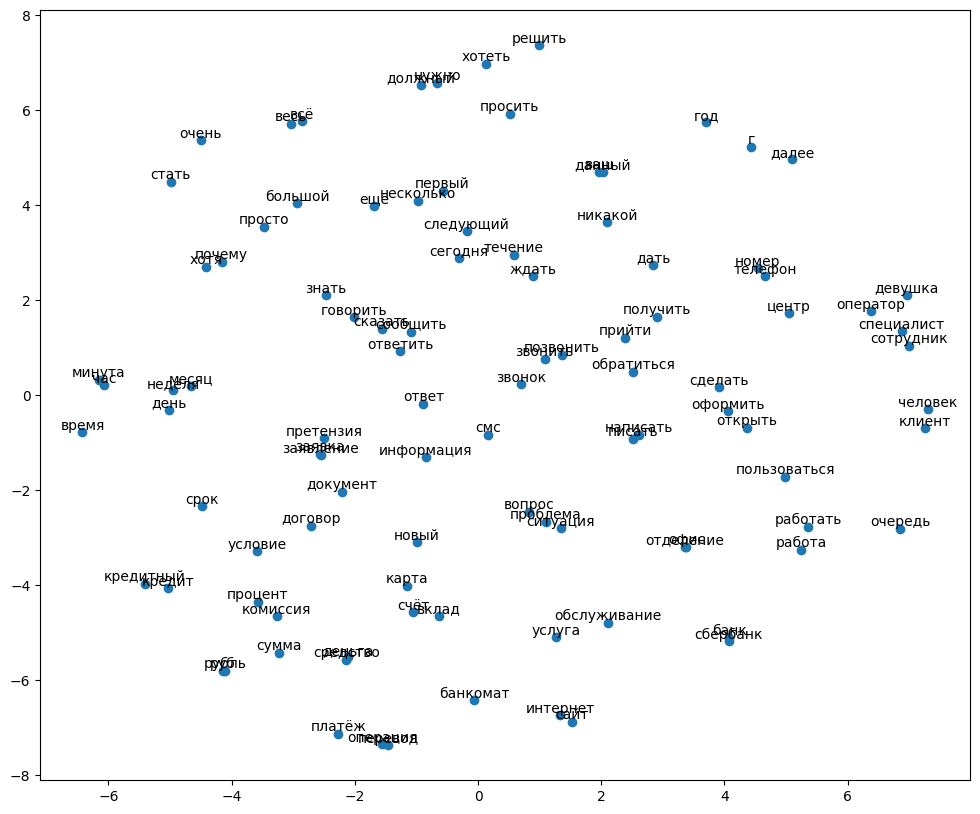

In [ ]:
figure(figsize=(12, 10))
plt.scatter(wv_tsne[:, 0], wv_tsne[:, 1])
# подписи к точкам
for ((xi, yi),tag) in zip(wv_tsne,dfv.index.to_list()):
    plt.text(xi, yi, tag, va='bottom', ha='center')

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
dfv_pca = pca.fit_transform(dfv)

In [ ]:
from sklearn import manifold

wv_tsne_all = manifold.TSNE(n_components=2, perplexity=40, init='pca', random_state=16).fit_transform(dfv_pca)#.iloc[:100])


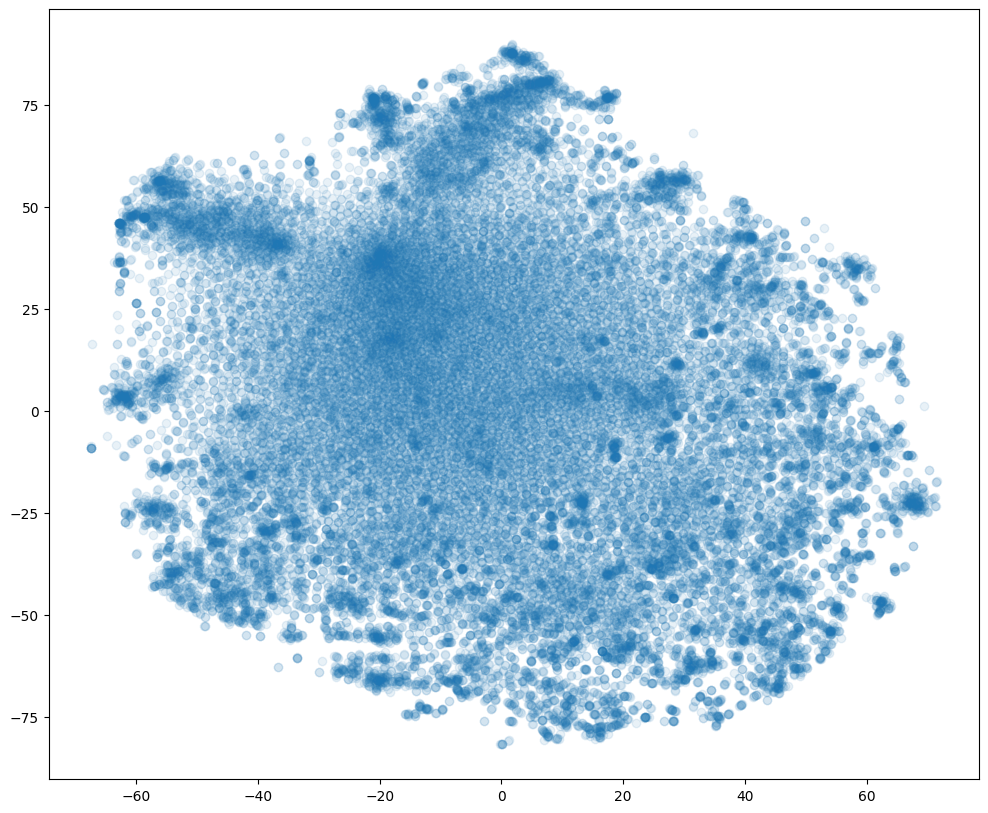

In [ ]:
figure(figsize=(12, 10))
plt.scatter(wv_tsne_all[:, 0], wv_tsne_all[:, 1], alpha=0.1)
# всё загораживается подписями
# for ((xi, yi),tag) in zip(wv_tsne_all,dfv.index.to_list()):
#     plt.text(xi, yi, tag, va='bottom', ha='center')

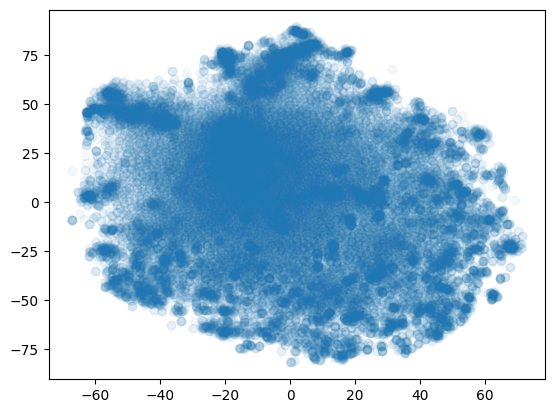

In [ ]:
# должна быть интерактивная аннотация при наведении, но тут не работает

import matplotlib.pyplot as plt
# import numpy as np; np.random.seed(1)

# x = np.random.rand(15)
# y = np.random.rand(15)
# names = np.array(list("ABCDEFGHIJKLMNO"))
names = np.array(dfv.index.to_list())
# c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
# sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)
sc = plt.scatter(wv_tsne_all[:, 0], wv_tsne_all[:, 1], alpha=0.05)



annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))),
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    # annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

#####quality

In [ ]:
banks_s = pd.Series(banks).str.lower()
banks_s

0              бинбанк
1             сбербанк
2                  отп
3          гагаринский
4             тинькофф
            ...       
667    алмазэргиэнбанк
668           юникбанк
669             витязь
670        независимый
671           бризбанк
Length: 672, dtype: object

In [ ]:
banks_s = dfv.index & set(banks_s)
dfv.loc[banks_s]

0         1         2         3         4    \
сбербанк           -0.038112 -0.084577 -0.143719 -0.020008  0.065890   
первый              0.028397 -0.061856  0.052751 -0.045974  0.052976   
центр              -0.054636 -0.009674 -0.061318 -0.086360  0.066522   
москва             -0.008058  0.044275 -0.034234 -0.002196  0.071708   
система            -0.016580 -0.009967  0.049971  0.053643  0.114956   
...                      ...       ...       ...       ...       ...   
байкалбанк          0.047013  0.031541  0.082165 -0.043278  0.029537   
тверьуниверсалбанк -0.018292  0.048979 -0.033415 -0.055573  0.106839   
промсервисбанк     -0.006666  0.125340 -0.098162 -0.039654  0.038823   
уралпромбанк        0.087860 -0.011527 -0.033694 -0.011908  0.062306   
автоторгбанк       -0.016490  0.112811 -0.004395  0.024842  0.039449   

                         5         6         7         8         9    ...  \
сбербанк           -0.022002 -0.043970  0.009597 -0.058294 -0.020796  ...   
первый              0.042056 -0.018230 -0.119416 -0.028800 -0.000533  ...   
центр               0.050096  0.018102 -0.059330 -0.017543 -0.031851  ...   
москва              0.034369  0.033840  0.034330 -0.002678 -0.161717  ...   
система             0.007006  0.015965  0.051478 -0.043019  0.048928  ...   
...                      ...       ...       ...       ...       ...  ...   
байкалбанк         -0.101157  0.013483  0.063826 -0.142445 -0.132350  ...   
тверьуниверсалбанк -0.032917  0.022740  0.082059  0.046636 -0.049023  ...   
промсервисбанк     -0.028407  0.099382  0.059038  0.029146 -0.091809  ...   
уралпромбанк       -0.014019  0.081296  0.062207  0.026443 -0.136481  ...   
автоторгбанк       -0.074624  0.082971  0.095570  0.029707 -0.056445  ...   

                         290       291       292       293       294  \
сбербанк           -0.032353 -0.050777 -0.097380  0.063249 -0.055959   
первый             -0.038757  0.079278  0.032818 -0.038182 -0.021900   
центр              -0.042526  0.023487 -0.024583 -0.027545  0.026683   
москва             -0.055328  0.047040 -0.103514  0.008029  0.060485   
система             0.035125 -0.050800 -0.017426  0.057172  0.003330   
...                      ...       ...       ...       ...       ...   
байкалбанк          0.080021 -0.018327  0.063959 -0.049629 -0.017588   
тверьуниверсалбанк  0.086053  0.027832  0.041007 -0.010587  0.088191   
промсервисбанк      0.061993  0.039703  0.001464 -0.034131  0.058615   
уралпромбанк        0.024891 -0.005709 -0.013288 -0.111351 -0.055522   
автоторгбанк        0.005221  0.003547  0.086222 -0.084715  0.147897   

                         295       296       297       298       299  
сбербанк           -0.070439 -0.071932  0.028327 -0.071429  0.081704  
первый             -0.131839  0.054172  0.006609 -0.093804  0.063374  
центр              -0.003754  0.055123 -0.033010 -0.000278  0.027755  
москва              0.067119 -0.087102 -0.051983  0.021201  0.019498  
система             0.092984  0.020612 -0.038591 -0.055234  0.044548  
...                      ...       ...       ...       ...       ...  
байкалбанк         -0.133971  0.088354 -0.048328  0.064114 -0.084876  
тверьуниверсалбанк  0.017212  0.096792  0.002909 -0.009313 -0.007987  
промсервисбанк     -0.052114  0.032019 -0.089202  0.055324 -0.054564  
уралпромбанк        0.052635 -0.003977  0.012371  0.083311 -0.050860  
автоторгбанк       -0.026127 -0.025138 -0.100316  0.041775 -0.010801  

[354 rows x 300 columns]

In [ ]:
dfv.loc['хорошо']

0      0.034864
1     -0.116530
2     -0.023257
3     -0.018651
4     -0.033163
         ...   
295    0.044445
296    0.035956
297   -0.073602
298   -0.014644
299   -0.078435
Name: хорошо, Length: 300, dtype: float32

In [ ]:
colors = plt.cm.tab20.colors
def word2viz_plot(df, words, x_op, y_op, labels=None):
    """Plot selected words on a 2-D plane
      Each word gets its coordinates x and y from
      its dot product with the vector differences x_op, and y_op
    """
    dfs = df.loc[words]
    x2, x1 = x_op.split(" - ")
    y2, y1 = y_op.split(" - ")
    x_label = "%s --------> %s" % (x1, x2)
    y_label = "%s --------> %s" % (y1, y2)

    word_labels = dfs.index if labels is None else labels

    xy = pd.DataFrame()
    # dfs["x"] = dfs.iloc[:,:100].dot(df.loc[x2] - df.loc[x1])
    # dfs["y"] = dfs.iloc[:,:100].dot(df.loc[y2] - df.loc[y1])
    xy["x"] = dfs.dot(df.loc[x2] - df.loc[x1])
    xy["y"] = dfs.dot(df.loc[y2] - df.loc[y1])

    fig = plt.figure(figsize=(12,10))#, dpi=300)
    ax = fig.add_subplot(1,1,1)

    for i in range(len(dfs)):
        x, y, text = xy.iloc[i]["x"], xy.iloc[i]["y"], word_labels[i]
        ax.scatter(x, y, alpha=0.9, c=colors[i%20])
        ax.text(x, y, text, alpha=0.9, color=colors[i%20])

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.show()

In [ ]:
# dfv.loc['быстро']-dfv.loc['медленно']
# dfs =
dfv.loc[banks_s].dot( dfv.loc['медленно']-dfv.loc['быстро'] )

сбербанк              0.001938
первый               -0.032554
центр                -0.033628
москва               -0.041724
система               0.159893
                        ...   
байкалбанк            0.122803
тверьуниверсалбанк    0.033885
промсервисбанк        0.129251
уралпромбанк          0.046601
автоторгбанк          0.218566
Length: 354, dtype: float32

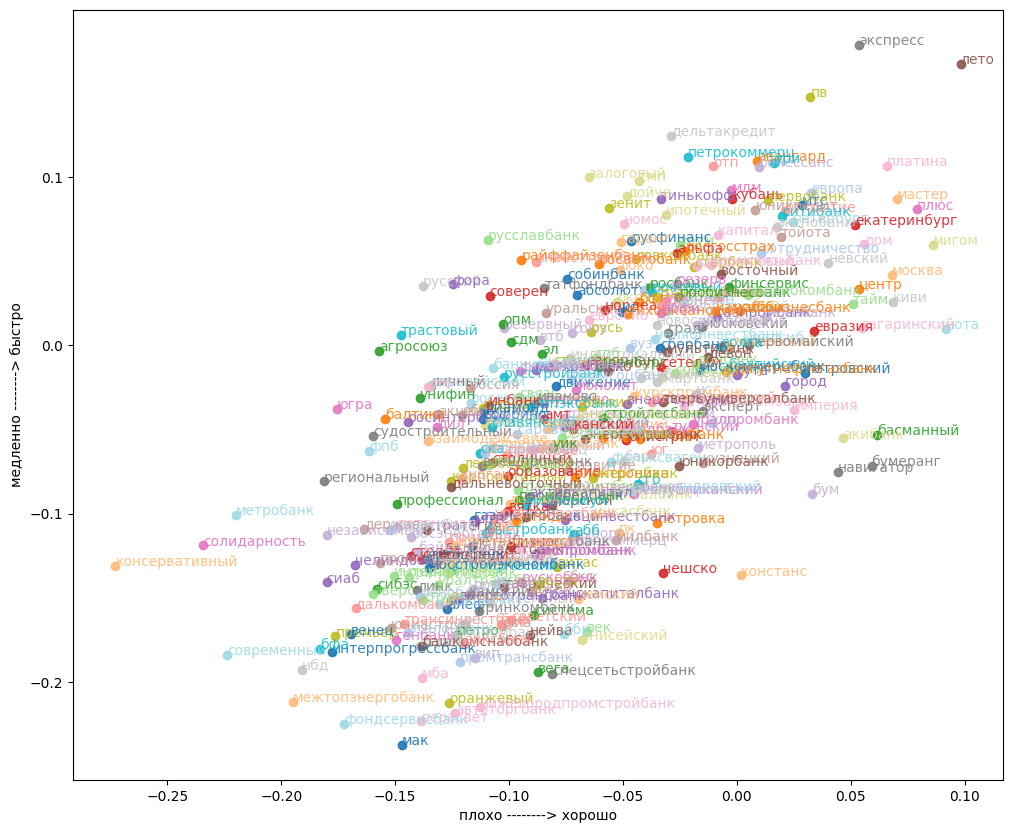

In [ ]:
word2viz_plot(dfv, banks_s, "хорошо - плохо", "быстро - медленно", labels=banks_s)
# word2viz_plot(dfv, dfv.index, "хорошо - плохо", "быстро - медленно", labels=dfv.index)

## Часть 2. Распространение метки [50 баллов]

Определите 5-8 позитивных слов (например, “быстрый”, “удобный”) и 5-8  негативных слов (например,“очередь”, “медленно”). Эти слова будут основной будущего оценочного словаря. Пусть позитивному классу соответствует метка 1, негативному – -1. Пометьте выбранные слова в лексическом графе соответствующими метками. Запустите любой известный вам метод распространения метки (Label Propogation) в лексическом графе. На выходе метода распространения ошибки должны быть новые слова, помеченные метками 1 и -1 – это и есть искомые оценочные слова.

Алгоритмы распространения метки устроены примерно так: пусть мы находимся в выршине, помеченном +1. С какой-то вероятностью мы переносим эту метку на соседние узлы. С меньшей вероятностью переносим ее на вершины на расстоянии два. В конце распространения метки, часть вершин оказывается помечена меткой +1, часть – -1, большая часть остается без метки.

Рекомендуемые алгоритмы распространения метки:
1. ```graphlab.label_propagation``` (```graphlab``` доступен бесплатно по образовательной лицензии)
2. ```sklearn.semi_supervised.LabelPropagation```
3. ```sklearn.semi_supervised.LabelSpreading```

In [ ]:
colors = plt.cm.tab20.colors
def word2viz_smart_plot(df, words, x_op, y_op, b_g=0, r=0.5, labels=None):
    """Plot selected words on a 2-D plane
      Each word gets its coordinates x and y from
      its dot product with the vector differences x_op, and y_op
    """
    dfs = df.loc[words]
    x2, x1 = x_op.split(" - ")
    y2, y1 = y_op.split(" - ")
    x_label = "%s --------> %s" % (x1, x2)
    y_label = "%s --------> %s" % (y1, y2)

    word_labels = dfs.index if labels is None else labels

    xy = pd.DataFrame()
    # dfs["x"] = dfs.iloc[:,:100].dot(df.loc[x2] - df.loc[x1])
    # dfs["y"] = dfs.iloc[:,:100].dot(df.loc[y2] - df.loc[y1])
    xy["x"] = dfs.dot(df.loc[x2] - df.loc[x1])
    xy["y"] = dfs.dot(df.loc[y2] - df.loc[y1])

    fig = plt.figure(figsize=(12,10))#, dpi=300)
    ax = fig.add_subplot(1,1,1)

    for i in range(len(dfs)):
        if ( (b_g>0 and xy.iloc[i]["x"]>0)
          or (b_g<0 and xy.iloc[i]["x"]<0)
          or b_g == 0
          ):
            length = np.linalg.norm(xy.iloc[i])
            if length>r:
                x, y, text = xy.iloc[i]["x"], xy.iloc[i]["y"], word_labels[i]
                ax.scatter(x, y, alpha=0.9, c=colors[i%20])
                ax.text(x, y, text, alpha=0.9, color=colors[i%20])

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    plt.show()

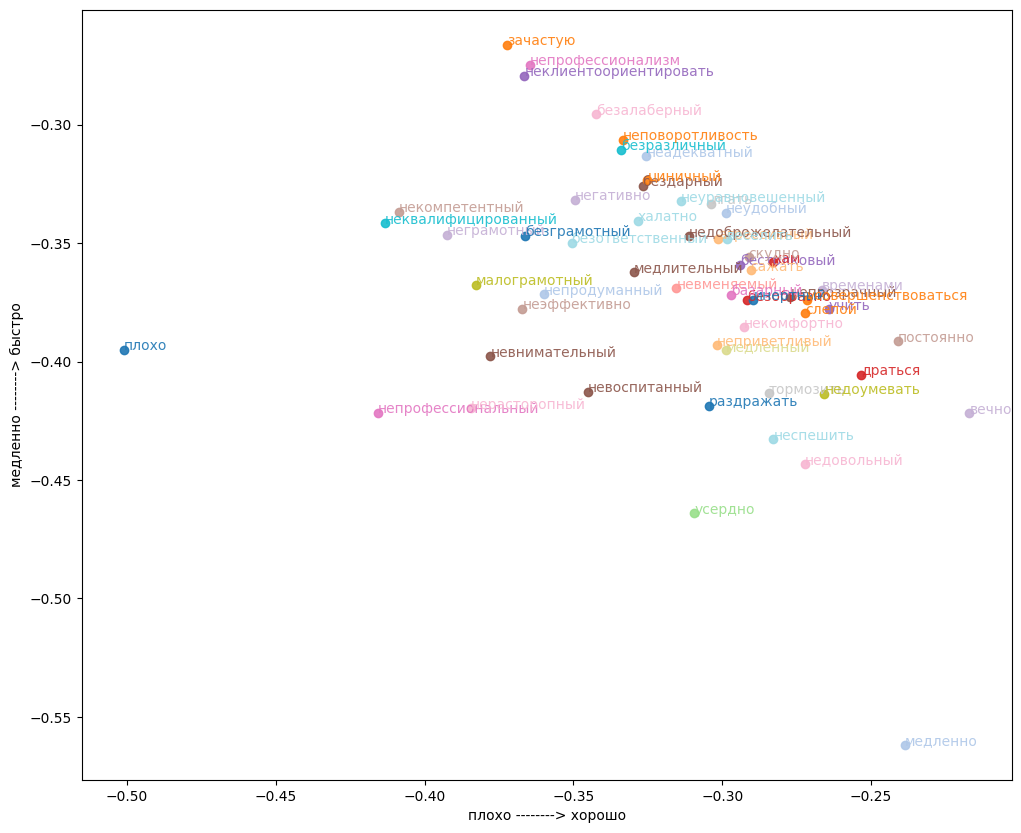

In [ ]:
# word2viz_plot(dfv, banks_s, "хорошо - плохо", "быстро - медленно", labels=banks_s)
word2viz_smart_plot(dfv, dfv.index, "хорошо - плохо", "быстро - медленно", -1, 0.45, labels=dfv.index)

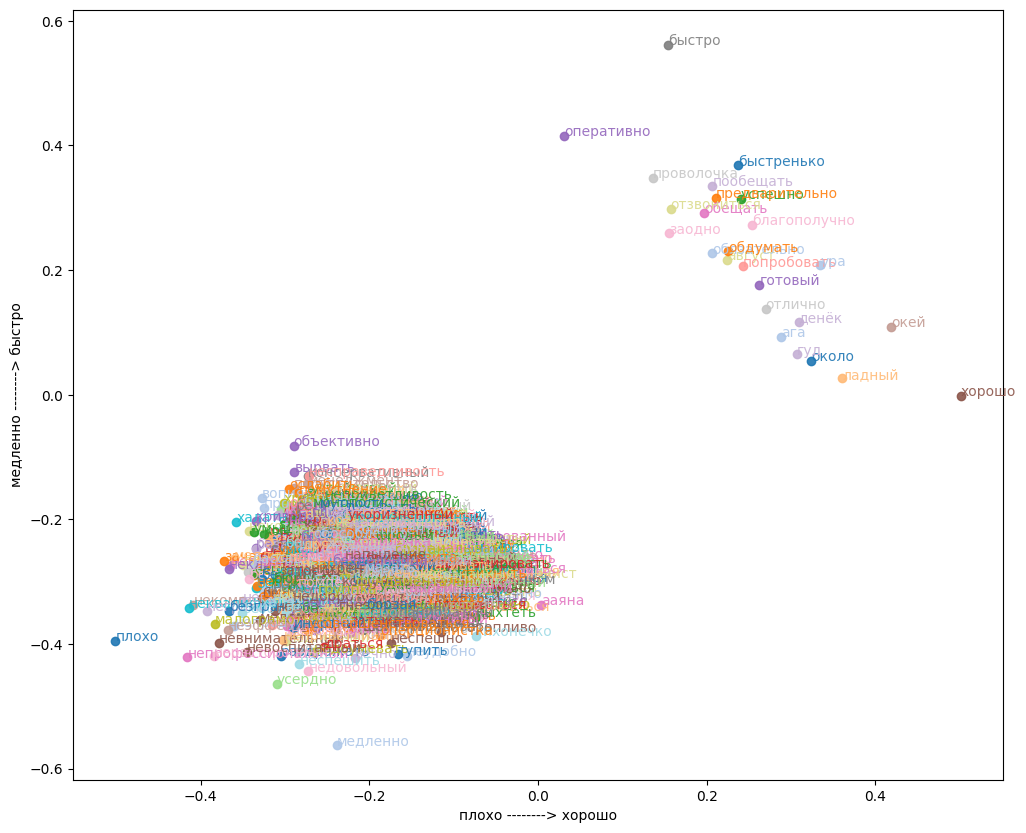

In [ ]:
good = ['быстро'
        ,'хорошо'
        ,'благополучно'
        ,'оперативно'
        ,'отлично'
        ,'удобно'
        ]
bad = ['плохо'
      ,'медленно'
      ,'недовольный'
      ,'очередь'
      ,'халатно'
      ,'неудобный'
      ,'некомпетентный'
      ,'хамский'
      # ,''
      ]

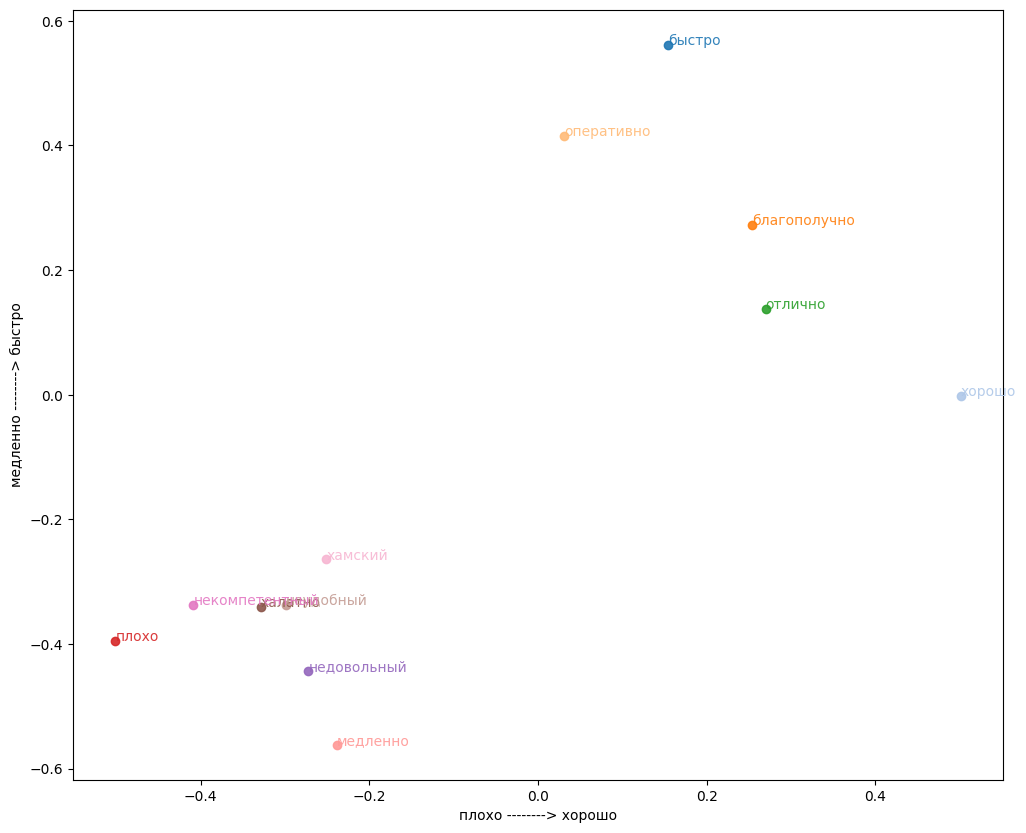

In [ ]:
# word2viz_plot(dfv, banks_s, "хорошо - плохо", "быстро - медленно", labels=banks_s)
word2viz_smart_plot(dfv, good+bad, "хорошо - плохо", "быстро - медленно", 0, 0.25, labels=good+bad)

In [ ]:
!pip install igraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 25.0 MB/s eta 0:00:00


In [ ]:
# пример построения графа

import igraph as ig
g = ig.Graph(directed=True)
for word in model.wv.index_to_key:
    g.add_vertex(word)



for word in model.wv.index_to_key :
    node = g.vs.select(name = word).indices[0]
    similar_words = model.wv.most_similar(word, topn=5)
    for sim in similar_words:
        word1 = sim[0]
        val  = sim[1]
        new_node = g.vs.select(name = word1).indices[0]
        g.add_edge(node, new_node, weight = val)

In [ ]:
type(g)

igraph.Graph

In [54]:
g.vs(name = 'ж')[0].index #.indices[0]

1121

In [37]:
len(g.es)

176310

In [45]:
[g.vs[n] for n in g.es[0].tuple]

[igraph.Vertex(<igraph.Graph object at 0x7cb75cca6040>, 0, {'name': 'в'}),
 igraph.Vertex(<igraph.Graph object at 0x7cb75cca6040>, 3136, {'name': 'подводить'})]

In [39]:
g.es[0].attributes()

{'weight': 0.3044205904006958}

In [46]:
g.vs["tag"] = -1
g.vs['tag']

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


In [63]:
g.vs[0].attributes()

{'name': 'в', 'tag': -1}

In [61]:
# for word in good:
g.vs(name_in = good)['tag'] = 1
for vx in g.vs(name = 'хорошо'): print (vx.attributes())
for vx in g.vs(name = 'оперативно'): print (vx.attributes())
g.vs(name_in = bad)['tag'] = 0
for vx in g.vs(name = 'плохо'): print (vx.attributes())
for vx in g.vs(name = 'хамский'): print (vx.attributes())

{'name': 'хорошо', 'tag': 1}
{'name': 'оперативно', 'tag': 1}
{'name': 'плохо', 'tag': 0}
{'name': 'хамский', 'tag': 0}


#####Save graph

In [62]:
g.save("/content/data/wv_network.gml")


In [ ]:
g = ig.load("/content/data/wv_network.gml")

###sklearn.label_propagation

In [81]:
dflp = pd.DataFrame(wv.get_normed_vectors()
                  ,index=wv.index_to_key
                   )
print(dflp)
idxs = pd.Series(wv.index_to_key)
print(idxs)

X = dflp.copy()
X['tag'] = -1
X.loc[good,'tag'] = 1
X.loc[bad,'tag'] = 0
print( X.loc[good]['tag'], X.loc[bad,'tag'] )
y = X.pop('tag')
y.sum(), len(y)


                    0         1         2         3         4         5    \
в              0.007930  0.016790 -0.042148 -0.031632 -0.077319  0.023140   
я             -0.006972 -0.044738 -0.039764  0.009644  0.112678  0.081101   
и              0.043612 -0.041238 -0.019069 -0.031181  0.045629  0.029272   
не            -0.001092 -0.057278 -0.091619  0.061469  0.074804  0.013040   
на             0.019910  0.000173  0.054122 -0.095002  0.012769  0.050803   
...                 ...       ...       ...       ...       ...       ...   
состричь      -0.053142  0.037116 -0.019891 -0.036725 -0.041928  0.027246   
еэб           -0.009917 -0.085259  0.082251 -0.015175  0.080196 -0.045507   
психдиспансер -0.092844  0.025852  0.001216 -0.104899  0.126462 -0.014914   
цитрин         0.017617  0.145204 -0.071337 -0.058874  0.013150 -0.110530   
эсперанто      0.053787  0.122152  0.001948 -0.066191  0.005888 -0.012513   

                    6         7         8         9    ...       290  \
в  

(-35242, 35262)

In [82]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [95]:
idxs_good = [wv.key_to_index[key] for key in good]
idxs_bad  = [wv.key_to_index[key] for key in bad]
idxs_lab  = idxs_good + idxs_bad
idxs_ulab = idxs.index.to_list()
for idx in idxs_lab:
    idxs_ulab.remove(idx)

In [89]:
idxs_lab

[277, 315, 1504, 814, 1184, 568, 1108, 2074, 1424, 99, 6653, 2355, 1382, 1499]

In [96]:
idxs_ulab
# .index.to_list()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,

In [97]:
X_train = X.loc[idxs_lab]
y_train = y.loc[idxs_lab]
X_test = X.loc[idxs_ulab]
y_test = y.loc[idxs_ulab]

In [103]:
# evaluate label propagation on the semi-supervised learning dataset
from sklearn.semi_supervised import LabelPropagation

# define model

model = LabelPropagation()

# fit model on training dataset

model.fit(X_train, y_train)

y_proba = model.predict_proba(X_test)
y_proba[:,0], y_proba


(array([1.19839486e-01, 5.10760455e-03, 4.54154637e-04, ...,
        2.37488619e-01, 9.99270458e-01, 9.99910038e-01]),
 array([[1.19839486e-01, 8.80160514e-01],
        [5.10760455e-03, 9.94892395e-01],
        [4.54154637e-04, 9.99545845e-01],
        ...,
        [2.37488619e-01, 7.62511381e-01],
        [9.99270458e-01, 7.29541627e-04],
        [9.99910038e-01, 8.99619430e-05]]))

In [116]:
bad_prob = pd.Series(y_proba[:,0]
                    ,index = idxs_ulab
                    ).sort_values(ascending=False)
bad_prob

6410    1.000000e+00
4643    1.000000e+00
5852    1.000000e+00
5134    1.000000e+00
3692    1.000000e+00
            ...     
494     3.200091e-07
2979    2.642629e-07
3517    1.763922e-07
3505    7.366428e-08
1011    2.693021e-11
Length: 35248, dtype: float64

In [117]:
# "плохие" предсказания
[ wv.index_to_key[i] for i in bad_prob.index.to_list() ]

['пренебрежительный',
 'неграмотный',
 'неуважительный',
 'безграмотный',
 'неквалифицированный',
 'наплевательск',
 'безответственно',
 'хамство',
 'издевательский',
 'наплевательский',
 'наглый',
 'высокомерный',
 'бестактный',
 'откровенный',
 'грубый',
 'халатность',
 'свинский',
 'безответственный',
 'неадекватный',
 'надменный',
 'небрежный',
 'непрофессионализм',
 'безапелляционный',
 'неподобающий',
 'безграмотность',
 'некомпетентность',
 'невнимательный',
 'хамоватый',
 'непрофессиональный',
 'недоброжелательный',
 'беспардонный',
 'оскорбительный',
 'безалаберный',
 'лгать',
 'грубость',
 'манера',
 'скотский',
 'нерасторопность',
 'истеричный',
 'безответственность',
 'толпа',
 'невоспитанный',
 'халатный',
 'непрофессиональность',
 'бесцеремонный',
 'неквалифицировать',
 'необученный',
 'раздолбайство',
 'панибратский',
 'возмутить',
 'подчинённый',
 'вызывающий',
 'нерадивый',
 'неадекватность',
 'низкоквалифицировать',
 'неуравновешенный',
 'безалаберность',
 'уничижител

In [129]:
# "плохие" предсказания
len([ wv.index_to_key[i] for i in bad_prob[ bad_prob > 0.999999 ].index.to_list() ])

782

In [118]:
good_prob = pd.Series(y_proba[:,1]
                    ,index = idxs_ulab
                    ).sort_values(ascending=False)
good_prob

1011    1.000000e+00
3505    9.999999e-01
3517    9.999998e-01
2979    9.999997e-01
494     9.999997e-01
            ...     
3692    2.636688e-13
5134    1.026551e-13
5852    6.571054e-14
4643    2.916727e-14
6410    5.357865e-15
Length: 35248, dtype: float64

In [119]:
# "хорошие" предсказания
[ wv.index_to_key[i] for i in good_prob.index.to_list() ]

['успешно',
 'окей',
 'взамен',
 'вскоре',
 'август',
 'июнь',
 'июль',
 'быстренько',
 'октябрь',
 'апрель',
 'февраль',
 'март',
 'аванс',
 'ноябрь',
 'карточка',
 'супер',
 'ошибочно',
 'январь',
 'положительно',
 'ладный',
 'май',
 'декабрь',
 'порезать',
 'соответственно',
 'намереваться',
 'сентябрь',
 'счёт',
 'ура',
 'гуд',
 'карта',
 'обратно',
 'пообещать',
 'замечательный',
 'обещать',
 'заодно',
 'нормально',
 'бронь',
 'ага',
 'окончательно',
 'затем',
 'долгожданный',
 'моментально',
 'маржиналка',
 'чудесно',
 'естественно',
 'пробный',
 'бесследно',
 'недоставать',
 'попытаться',
 'неактивированный',
 'чек',
 'успокоиться',
 'съесть',
 'якобы',
 'пополам',
 'предварительно',
 'разрезать',
 'зажевать',
 'нечаянно',
 'выплюнуть',
 'бесплатно',
 'сдать',
 'попытка',
 'открутить',
 'вчера',
 'исправимый',
 'налом',
 'дистанционно',
 'планировать',
 'надеиться',
 'завтра',
 'кредитка',
 'грамотно',
 'бумажник',
 'г',
 'вроде',
 'идеально',
 'задаток',
 'зачислиться',
 'насов

In [130]:
# "хорошие" предсказания
len([ wv.index_to_key[i] for i in good_prob[ good_prob > 0.99 ].index.to_list() ])

681

#Теория. Анализ новостных сообщений

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Teaching/Netology/NLP/data/lenta-ru-news.csv', usecols = ['title', 'text', 'topic', 'tags'])
df = pd.read_csv('/content/drive/MyDrive/скул/DS/data/lenta-ru-news.csv', usecols = ['title', 'text', 'topic', 'tags'])

In [ ]:
df.tail()

title  \
800970          Шнуров раскритиковал Гагарину на «Голосе»   
800971  В России предложили изменить правила взыскания...   
800972          В России назвали «черную дату» для Европы   
800973        Россиянам пообещали аномально теплую погоду   
800974  В конкурсе прогнозов на АПЛ разыграют 100 тыся...   

                                                     text topic  \
800970  Певец Сергей Шнуров раскритиковал свою коллегу...   NaN   
800971  Министерство юстиции России предложило изменит...   NaN   
800972  Испытание США ранее запрещенной Договором о ли...   NaN   
800973  В ближайшие дни в европейской части России пог...   NaN   
800974  Ведущие футбольные чемпионаты ушли на зимние к...   NaN   

                     tags  
800970         ТВ и радио  
800971                Все  
800972           Политика  
800973           Общество  
800974  Английский футбол

In [ ]:
# df.text[ 'орман' in df.text.str ]
# np.where('орман' in df.text.str, df.text.str, None)
for row in df[df.topic == 'Бывший СССР'].iterrows(): #text:
    # print(row[1].text)
    try:
        if ('орман' in row[1].text) and ('формат' not in row[1].text):
            print(row[0], row[1].text)
    except: pass

145711 Посол США в Эстонии Альдона Воз отклонила приглашение на церемонию открытия нового здания Художественного музея в Таллине, поскольку в ней принимал участие бывший сотрудник эстонской полиции Харри Мяннил. Об этом, как пишет латвийская газета ЧАС сообщил пресс-атташе американского посольства Эрик Джонсон. "Мы не хотели участвовать в том же мероприятии, что и Харри Мяннил", - сказал Джонсон. По его словам, около десяти лет назад власти США оформляли Мяннилу визу и в связи с этим выясняли подробности его биографии. "США считают, что он, работая в политической полиции Эстонии, вместе с нацистами участвовал в слежке. В соответствии с Нюрнбергской хартией это является преступлением против человечества", - отметил Джонсон. При этом пресс-атташе добавил, что мнение американской стороны по этому вопросу остается прежним, о чем были извещены и эстонские власти. "Мы считаем, что Харри Мяннил лично участвовал в слежке и разделяем мнение генерального прокурора Эстонии Нормана Ааса том, что М

In [ ]:
df['topic'].value_counts()

Россия               160445
Мир                  136621
Экономика             79528
Спорт                 64413
Культура              53797
Бывший СССР           53402
Наука и техника       53136
Интернет и СМИ        44663
Из жизни              27605
Дом                   21734
Силовые структуры     19596
Ценности               7766
Бизнес                 7399
Путешествия            6408
69-я параллель         1268
Крым                    666
Культпросвет            340
Легпром                 114
Библиотека               65
Оружие                    3
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: topic, dtype: int64

In [ ]:
df['tags'].value_counts()

Все               453762
Политика           40716
Общество           35202
Украина            22523
Происшествия       19825
                   ...  
Мировой опыт           6
Нацпроекты             6
Вооружение             3
Инновации              1
69-я параллель         1
Name: tags, Length: 94, dtype: int64

In [ ]:
sample = df[df['tags'] == 'Кино']
print(len(sample))

10720


### Предобработка

#### Оставляем только слова:

In [ ]:
import re
regex = re.compile("[А-Яа-я]+")

In [ ]:
def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


sample.text = sample.text.str.lower()
sample.text = sample.text.apply(words_only)

In [ ]:
sample.text.iloc[0]

'американского актера уэсли снайпса в четверг приговорили к трем годам тюремного заключения за неуплату налогов в период с по годы передает агентство таким образом актер получил максимальный срок за каждый из трех эпизодов неуплаты налогов ранее со снайпса сняли более серьезные обвинения в мошенничестве и сговоре с целью ввести в заблуждение налоговую службу на судебном заседании в четверг адвокаты исполнителя роли блейда в одноименной трилогии представили три десятка писем от членов его семьи друзей и коллег актеров в которых описывался его прекрасный характер защита настаивала что снайпсу будет достаточно условного наказания так как ранее он к суду не привлекался обвинение в неуплате налогов на сумму в миллиона долларов было предъявлено снайпсу и еще двум соответчикам по делу в году как утверждали адвокаты актера он не осознавал что действует незаконно между тем приговоры в отношении соответчиков снайпса эдди рея кана и дугласа росайла будут вынесены в ближайшее время по версии обвин

#### Убираем стоп-слова:

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

print(mystopwords)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""
sample.text = sample.text.apply(remove_stopwords)

In [ ]:
sample.text.iloc[0][:100]

'американского актера уэсли снайпса четверг приговорили трем годам тюремного заключения неуплату нало'

#### Лемматизируем

In [ ]:
# from pymystem3 import Mystem

In [ ]:
# !pip install pymorphy2
# !pip install -U pymorphy2-dicts-ru

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [ ]:
# m = Mystem()
def lemmatize(text, m=morph):
    try:
        return ' '.join([    m.parse(word)[0].normal_form for word in text.split() ])
        # return "".join(m.lemmatize(text)).strip()
    except:
        return " "

In [ ]:
%%time
' '.join([    morph.parse(word)[0].normal_form for word in sample.text.iloc[0].split() ])
#  = sample.text.apply(lemmatize)

CPU times: user 29 ms, sys: 0 ns, total: 29 ms
Wall time: 30.8 ms


'американский актёр уэсли снайпёс четверг приговорить три год тюремный заключение неуплата налог период год передавать агентство такой образ актёр получить максимальный срок каждый три эпизод неуплата налог ранее снайпёс снять серьёзный обвинение мошенничество сговор цель ввести заблуждение налоговый служба судебный заседание четверг адвокат исполнитель роль блейда одноимённый трилогия представить десяток письмо член семья друг коллега актёр который описываться прекрасный характер защита настаивать снайпёс достаточно условный наказание ранее суд привлекаться обвинение неуплата налог сумма миллион доллар предъявить снайпёс два соответчик дело год утверждать адвокат актёр осознавать действовать незаконно приговор отношение соответчик снайпёс эдди рей кан дуглас росайла быть вынести близкий время версия обвинение кан руководить фирма разрабатывать мошеннический схема уклонение налог росайла осуществлять бухгалтерский деятельность истекший лицензия первый грозить десять год лишение свобода

In [ ]:
%%time
sample.text = sample.text.apply(lemmatize)

CPU times: user 4min 47s, sys: 1.65 s, total: 4min 48s
Wall time: 4min 53s


In [ ]:
sample.text.iloc[0][:100]

'американский актёр уэсли снайпёс четверг приговорить три год тюремный заключение неуплата налог пери'

#### Удаление стоп-лемм

In [ ]:
mystoplemmas = ['который', 'прошлый', 'сей', 'свой', 'наш', 'мочь', 'год']
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

sample.text = sample.text.apply(remove_stoplemmas)

### Частотный словарь и облако слов

In [ ]:
!pip3 install wordcloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
lemmata = [lemma for text in sample.text for lemma in text.split()]

In [ ]:
cnt = Counter(lemmata)

In [ ]:
for i in cnt.most_common(10):
    print(i)

('фильм', 21735)
('картина', 9595)
('актёр', 9241)
('роль', 8405)
('режиссёр', 8191)
('лента', 7009)
('сериал', 6400)
('стать', 6135)
('выйти', 4921)
('сообщать', 4894)


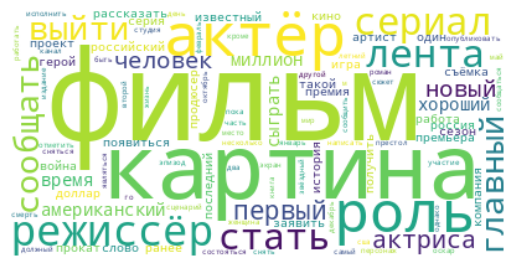

In [ ]:
word_freq = [i for i in cnt.most_common(100)]
wd = WordCloud(background_color = 'white')
wd.generate_from_frequencies(dict(word_freq))
plt.figure()
plt.imshow(wd, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Извлечение ключевых словосочетаний


Ключевые слова и словосочетания сложно определить формально. Поскольку определений ключевых слов и словосочетаний множество, существует масса методов их извлечения:
* с учителем VS без учителя
* по частотам VS посложнее
* из одного текста VS из коллекции текстов
* слова (униграммы) VS биграммы VS $N$-граммы
* термины VS именованные сущности VS коллокации
* последовательные слова VS с использованием окна

### Основные этапы извлечения ключевых слов и словосочетаний:
1. Порождение кандидатов
2. Оценка свойст кандидатов
3. Выбор лучших кандидатов

### Основные методы извлечения ключевых слов и словосочетаний:
* Морфологические шаблоны
* Меры ассоциации биграмм: PMI, T-Score, LLR
* Графовые методы: TextRank [Mihalcea, Tarau, 2004]
* Синтаксические шаблоны


### Морфологические шаблоны

Можно использовать парсер  Yargy.

Простейший шаблон ПРИЛ + СУЩ

```
S -> Adj<gnc-agr[1]> Noun<rt,gnc-agr[1]>;
```

### Использование мер связности


$w_1, w_2$ − два слова

$f(w_1), f(w_2)$ − их частоты

$f(w_1, w_2)$ − совместная частота биграммы $w_1 w_2$

$N$ − число слов

$PMI(w_1, w_2) = \log \frac{f(w_1, w_2)}{f(w_1)f(w_2)}$

$T-score(w_1, w_2) = \frac{f(w_1,w_2)-f(w_1)*f(w_2)}{f(w_1,w_2)/N}$

Другие меры связности: $\chi^2$

![chi-square](chi-square-formula.jpg)

### На практике

Получаем из датафрейма списки по разных топиков:

In [ ]:
def get_topic_to_tokens(df):
    tokens_by_topic = {}
    for topic in set(df['topic'].dropna()):

        # берём только относительно большие темы
#         print('---')
#         print(df['topic'])
        if df['topic'].dropna().value_counts()[topic] > 100:

            # берём по сто случайных текстов из каждой темы
            sample = df[df['topic']==topic].sample(n=100)

            # предобрабатываем
            sample.text = sample.text.str.lower()
            sample.text = sample.text.apply(words_only)
            sample.text = sample.text.apply(remove_stopwords)
            sample.text = sample.text.apply(lemmatize)
            sample.text = sample.text.apply(remove_stoplemmas)

            tokens_by_topic[topic] = [tok for text in sample.text for tok in text.split()]

    return tokens_by_topic

In [ ]:
tokens_by_topic = get_topic_to_tokens(df)

In [ ]:
tokens_by_topic.keys()

dict_keys(['Из жизни', 'Силовые структуры', 'Крым', 'Мир', 'Наука и техника', 'Путешествия', 'Ценности', 'Интернет и СМИ', 'Бывший СССР', 'Легпром', 'Культпросвет ', 'Бизнес', 'Культура', 'Экономика', 'Дом', 'Россия', 'Спорт', '69-я параллель'])

In [ ]:
tokens_by_topic['Бывший СССР'][2700:2730]

['отказаться',
 'допрашивать',
 'обыскивать',
 'блогер',
 'сослаться',
 'приписывать',
 'действие',
 'наказуемый',
 'российский',
 'закон',
 'заявить',
 'государственный',
 'прокурор',
 'республика',
 'норман',
 'аас',
 'эстонский',
 'сторона',
 'возможно',
 'объявить',
 'подозревать',
 'международный',
 'розыск',
 'уголовный',
 'дело',
 'связь',
 'распространение',
 'экстремистский',
 'информация',
 'правоохранительный']

In [ ]:
for topic,text in tokens_by_topic.items(): #,text
    try:
        print(topic)
        print(tokens_by_topic[topic].index('аас')) #('аас'))
        print(text.index('аас'))
    except: pass

Из жизни
Силовые структуры
Крым
Мир
Наука и техника
Путешествия
Ценности
Интернет и СМИ
Бывший СССР
2715
2715
Легпром
Культпросвет 
Бизнес
Культура
Экономика
Дом
Россия
Спорт
69-я параллель


Выберем тему, из текстов про которую будем извлекать ключевые слова:

In [ ]:
topic_texts = tokens_by_topic['Путешествия']

In [ ]:
topic_texts[:10]

Извлекаем биграммы по разным мерам связности:

In [ ]:
import nltk
from nltk.collocations import *

In [ ]:
bigram_measures = nltk.collocations.BigramAssocMeasures() # класс для мер ассоциации биграм
finder = BigramCollocationFinder.from_words(topic_texts) # класс для хранения и извлечения биграм

In [ ]:
N_best = 100 # число извлекаемых биграм

In [ ]:
%%time
finder.apply_freq_filter(3) # избавимся от биграм, которые встречаются реже трех раз

# выбираем топ-100 биграм по каждой мере
raw_freq_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.raw_freq, N_best)]
tscore_ranking = [' '.join(i) for i in finder.nbest(bigram_measures.student_t, N_best)]
pmi_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.pmi, N_best)]
chi2_ranking =  [' '.join(i) for i in finder.nbest(bigram_measures.chi_sq, N_best)]

Результаты:

In [ ]:
rankings = pd.DataFrame({
    'chi2': chi2_ranking,
    't-score' : tscore_ranking,
    'pmi': pmi_ranking,
    'raw_freq':raw_freq_ranking
})
rankings = rankings[['raw_freq', 'pmi', 't-score', 'chi2']]
rankings.head(10)

Похожи ли списки биграм? Давайте посчитаем корреляцию и визуализируем.

In [ ]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline

In [ ]:
corr = spearmanr(rankings).correlation

In [ ]:
corr

In [ ]:
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

Если у нас есть данные про время, можно считать "трендовые слова": те слова, ранг которых по частотности вырос по сравнению с предыдущим периодом.

#### Задание

Возьмите две главны какой-нибудь большой книжки (или другие текстовые данные, в которых что-то известно про время создания), и найдите трендовые слова используя разницу в порядке слова по частотности.

### Графовые методы

* Вершины графа: слова
* Ребра графа могут определяться по следующим правилам:
    * Последовательные слова
    * Слова внутри левого или правого окна в $\pm$ 2-5 слов  

* Ребра могут быть взвешенные или невзвешенные, направленные или ненаправленные
* Любая мера центральности графа используется для определения важности вершин в графе. Слова, соответствующие наиболее важным вершинам, считаются ключевыми.
* Если две соседние вершины оказываются важными, соответствующие им слова формируют ключевое словосочетание.

Меры центральностей.
![centralities](centrality_measures.png)

A) Betweenness centrality

B) Closeness centrality

C) Eigenvector centrality

D) Degree centrality

E) Harmonic centrality

F) Katz centrality of the same graph.

#### TextRank

Работает по тому же принципу, что и PageRank. Рёбра -- совстречаемость слов.

![PageRank](PageRank.jpg)

Используем TextRank для извлечения ключевых слов:

In [ ]:
!pip3 install gensim

In [ ]:
from gensim.summarization import keywords

ModuleNotFoundError: ignored

In [ ]:
%%time
text = ' '.join(topic_texts)
kw = keywords(text)

Результаты:

In [ ]:
rankings = pd.DataFrame({'Text Rank': kw.split('\n')})
rankings.head(10)

## Мера контрастности $tf-idf$



Частота терма [Luhn, 1957]:  Важность терма в тексте пропорциональная его частоте.

Обратная документная частота [Spaerck Jones, 1972]: Специфичность терма в тексте обратно пропорциональна числу текстов, в которых терм встречается.

$tfidf(term, text, collection) = tf(term, document) \times idf(term, collection)$

Самая популярная комбинация весов: $f_{t,d} \times \log \frac{|D|}{n_t+1}$

Извлекаем ключевые слова по $tf-idf$:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [ ]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for topic, tokens in tokens_by_topic.items()])
feature_names = tfidf.get_feature_names_out()
dense = tfidf_matrix.todense()

In [ ]:
feature_names

array(['аас', 'аас эстонский', 'аас эстонский сторона', ...,
       'ёмкость российский бизнес', 'ёмкость три', 'ёмкость три терабайт'],
      dtype=object)

In [ ]:
tfidf_matrix.todense()[8]#[197389]

matrix([[0.00390302, 0.00390302, 0.00390302, ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
topic_id = 5 #путешествия

In [ ]:
text = dense[topic_id].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)

In [ ]:
tfidf_ranking = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:100]:
    tfidf_ranking.append(phrase)

Результаты:

In [ ]:
rankings = pd.DataFrame({'tf-idf': tfidf_ranking})
rankings[90:120]

tf-idf
90       тут ру
91       чартер
92      таиланд
93         борт
94      хороший
95     посетить
96         июль
97        месяц
98      паспорт
99  туроператор